In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [2]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [3]:
import DiadFit as pf
pf.__version__

'0.0.37'

In [4]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# What group do you want to fit?
batch='Medium' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

In [5]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

In [6]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False

## Now load the files of interest

In [7]:
Diad_Files =GroupN_df['filename']
i=0
Diad_Files[i]

'Cap19-05X1.txt'

In [27]:
#Diad_Files=='15 MLP_9_FIB_8mW_r2.txt'

Cap19-05X1.txt


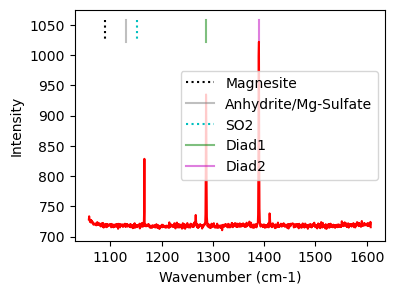

In [11]:
print(GroupN_df['filename'].iloc[i])
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

In [12]:
## Choose a model - option, pseudovoigt or voigt
model_name='PseudoVoigtModel'
# Specify the number of peaks, 1 = just peak, 2 = Peak+hot bands

## Fit Diad 1
- You can tweak the parameters in diad1_fit_config

In [13]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1310, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1330, 1350), diad_prom=216.69998170000008, HB_prom=18.599975600000107, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  \
0          1286.621101       1286.621151        336.672169           0.633487   

  Diad1_Voigt_Gamma     HB1_Cent   HB1_Area  HB1_Sigma  Diad1_Combofit_Height  \
0              None  1266.277894  31.914572   0.581626             224.609614   

   Residual_Diad1  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  
0        1.773255        0.311178    1.266974  Flagged Warnings:

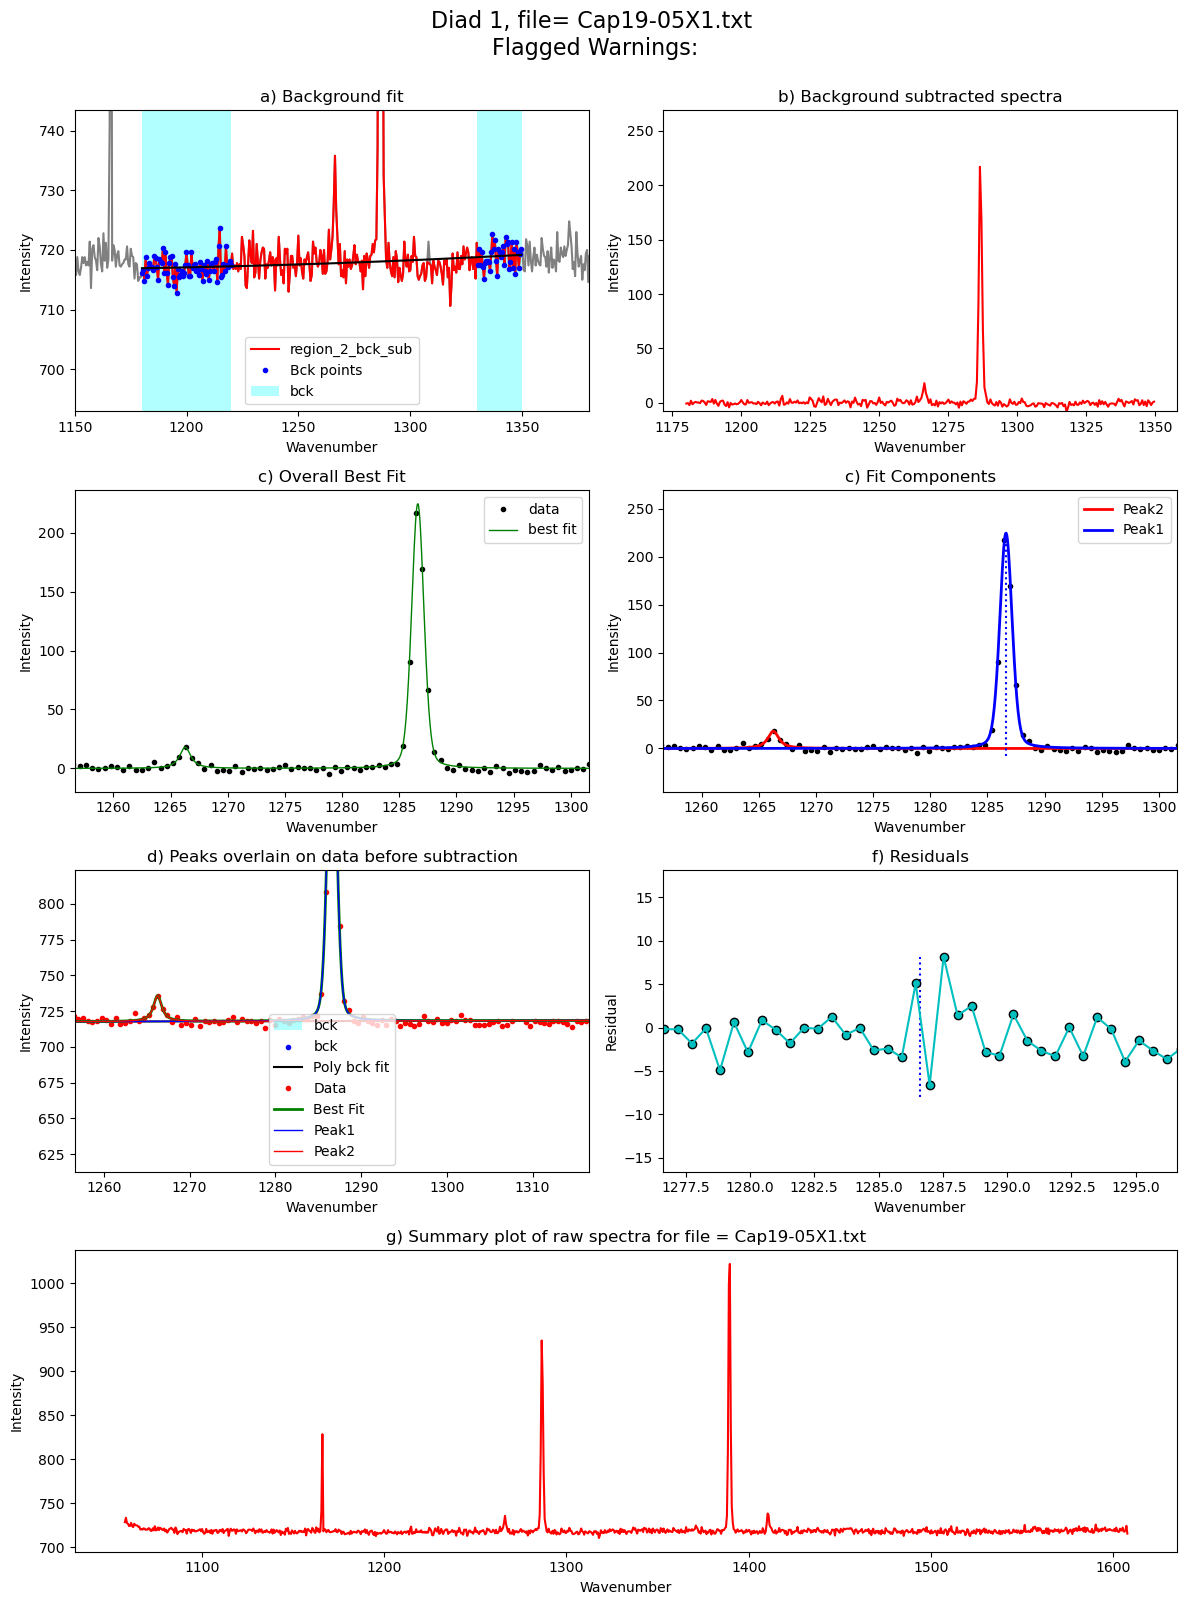

In [14]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i],
filetype=filetype, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

In [15]:
diad1_fit_config2=diad1_fit_config_init
#diad1_fit_config2.diad_sigma=Diad1_fit['Diad1_Voigt_Sigma'][0]
# diad1_fit_config2.sigma_allowance=2
# diad1_fit_config2

## Fit diad 2

In [16]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_prom'].iloc[i],
    C13_prom=GroupN_df['C13_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_prom'].iloc[i],
    C13_prom=GroupN_df['C13_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, fit_gauss=False, gauss_amp=38.60003660000007, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, C13_sigma=0.1, C13_prom=5.2999878000000535, sigma_allowance=10, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1340), upper_bck_diad2=(1440, 1470), diad_prom=302.74998475000007, HB_prom=19.300018300000033, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_Voigt_Area  Diad2_Voigt_Sigma  \
0           1389.42668        1389.42673        455.827293           0.609221   

  Diad2_Voigt_Gamma     HB2_Cent   HB2_Area  HB2_Sigma    C13_Cent  C13_Area  \
0              None  1410.670176  23.036379   0.684836  1371.14506  2.994257   

   C13_Sigma  Diad2_Combofit_Height  Residual_Diad2  Diad2_Prop_Lor  \
0    0.65586             333.317785        1.934792        0.160074   

   Diad2_fwhm        Diad2_refit  
0    1.218442  Flagged Warnings:

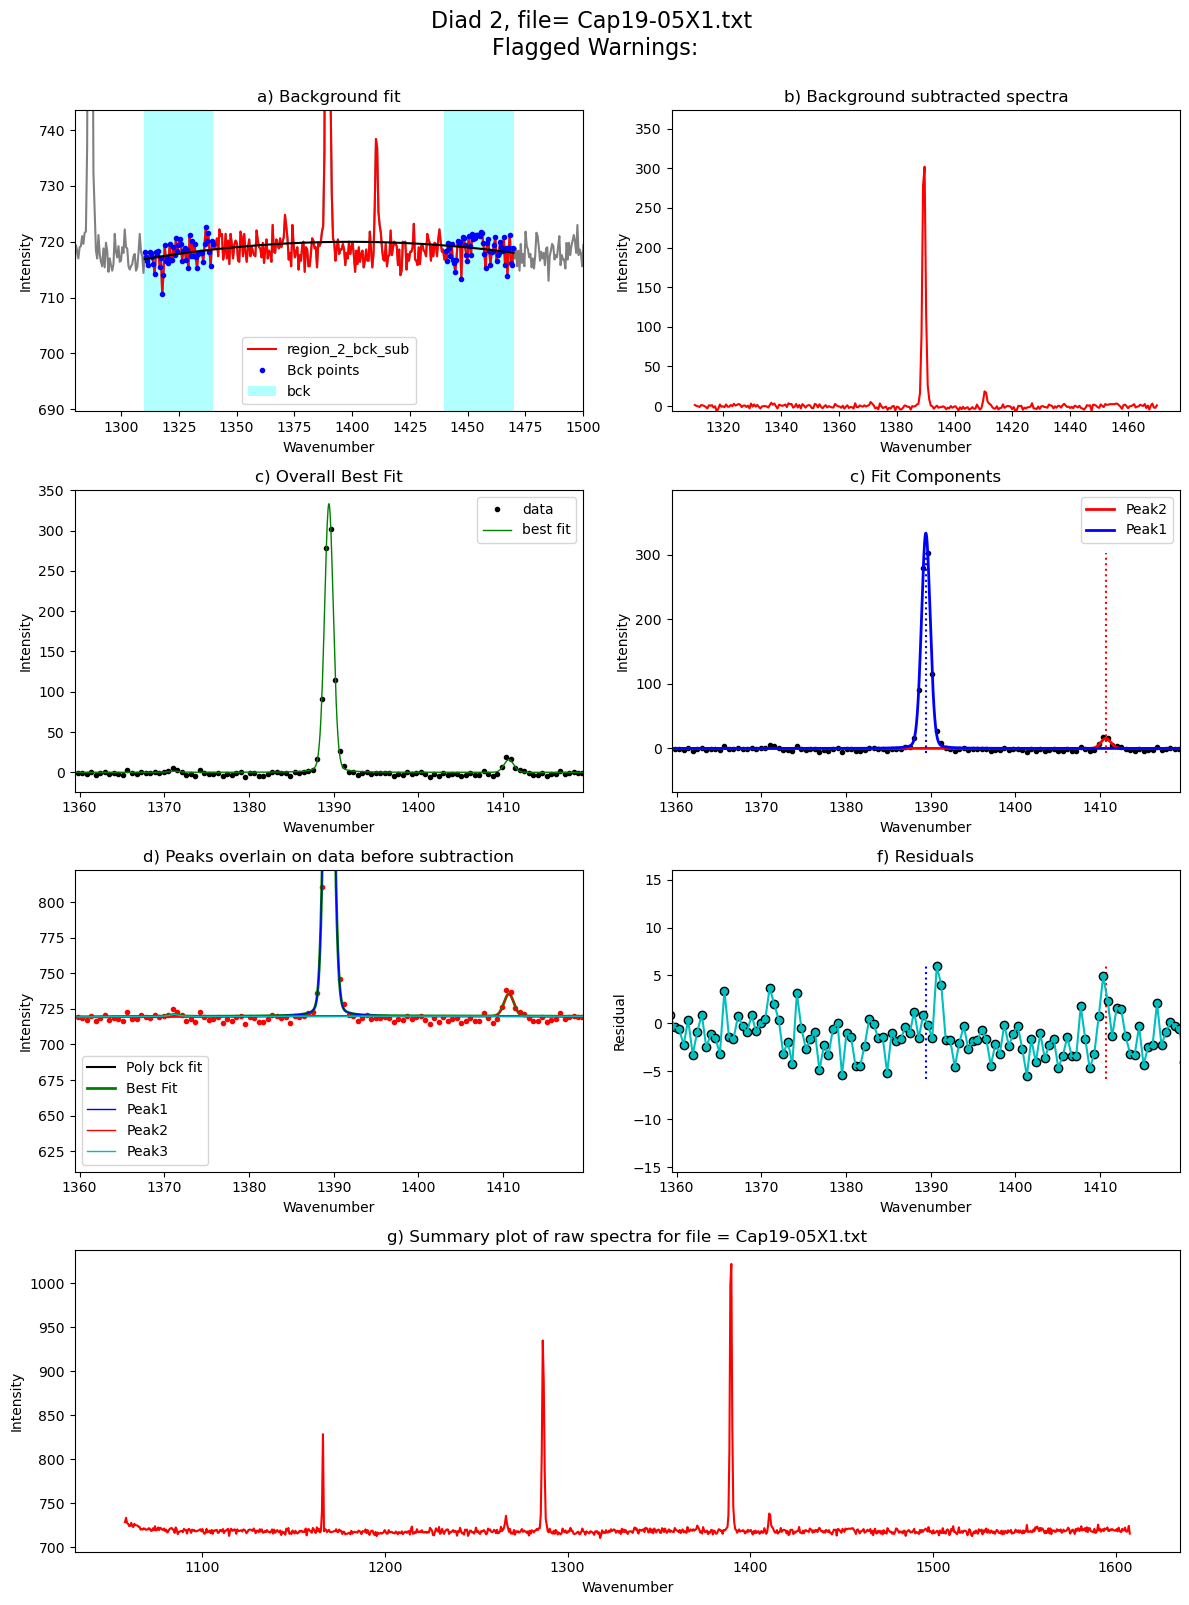

In [17]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i], filetype=filetype,
close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

In [35]:
diad2_fit_config2=diad2_fit_config_init
#diad2_fit_config2.diad_sigma=Diad2_fit['Diad2_Voigt_Sigma'][0]
# diad2_fit_config2.sigma_allowance=2
# diad2_fit_config2

## You can also try looping if all your spectra are pretty similar

 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [00:21<00:02,  2.18s/it]g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\diads.py:2601: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))
100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:23<00:00,  2.14s/it]


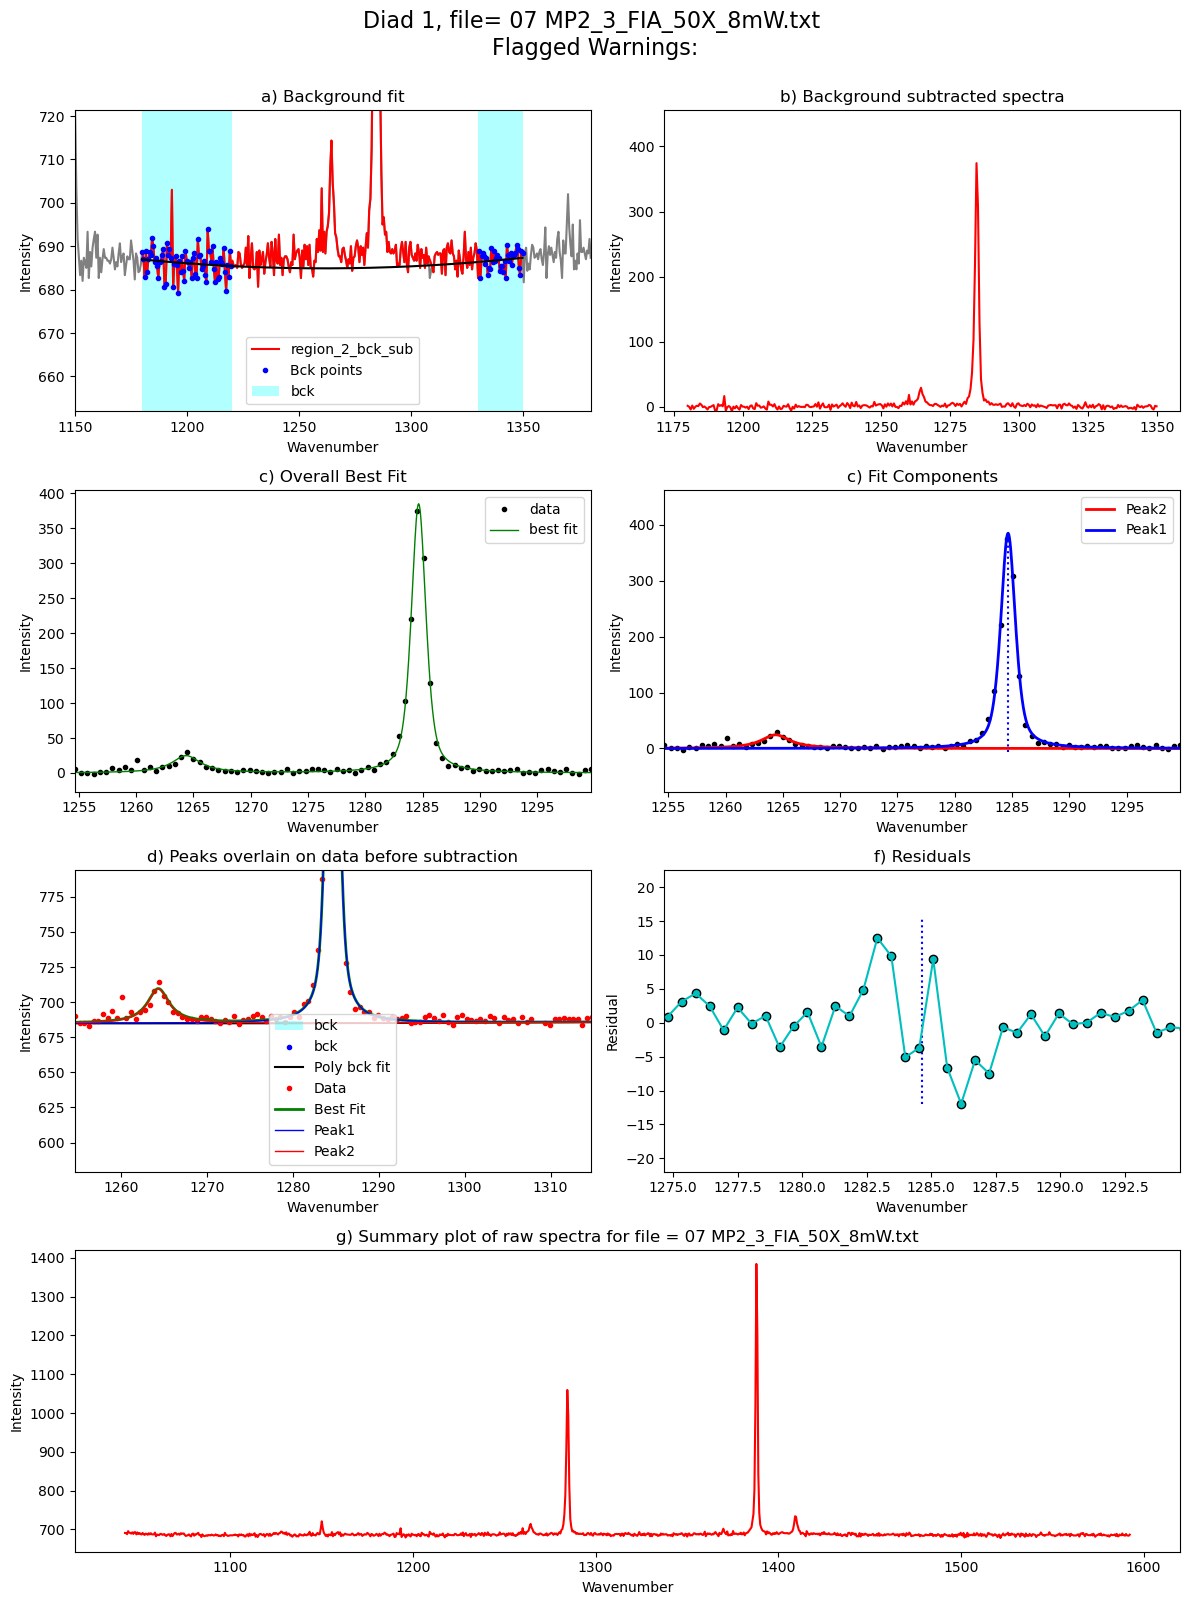

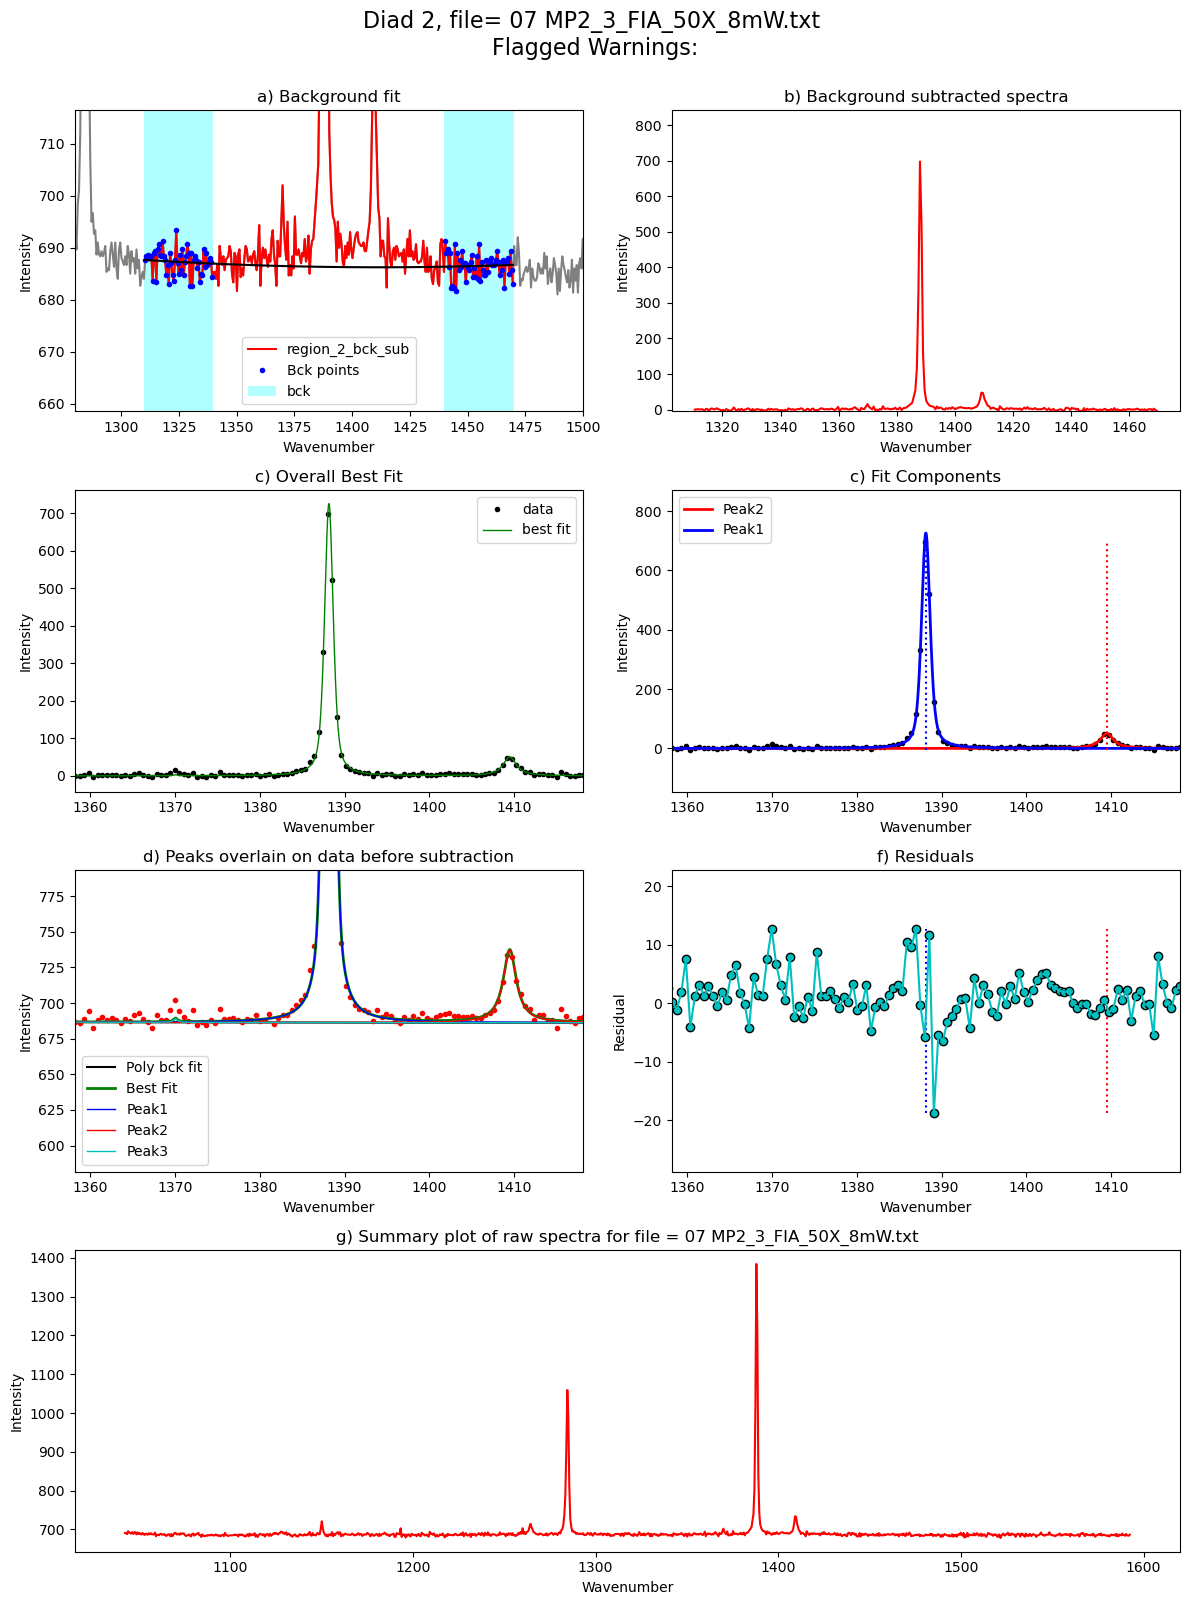

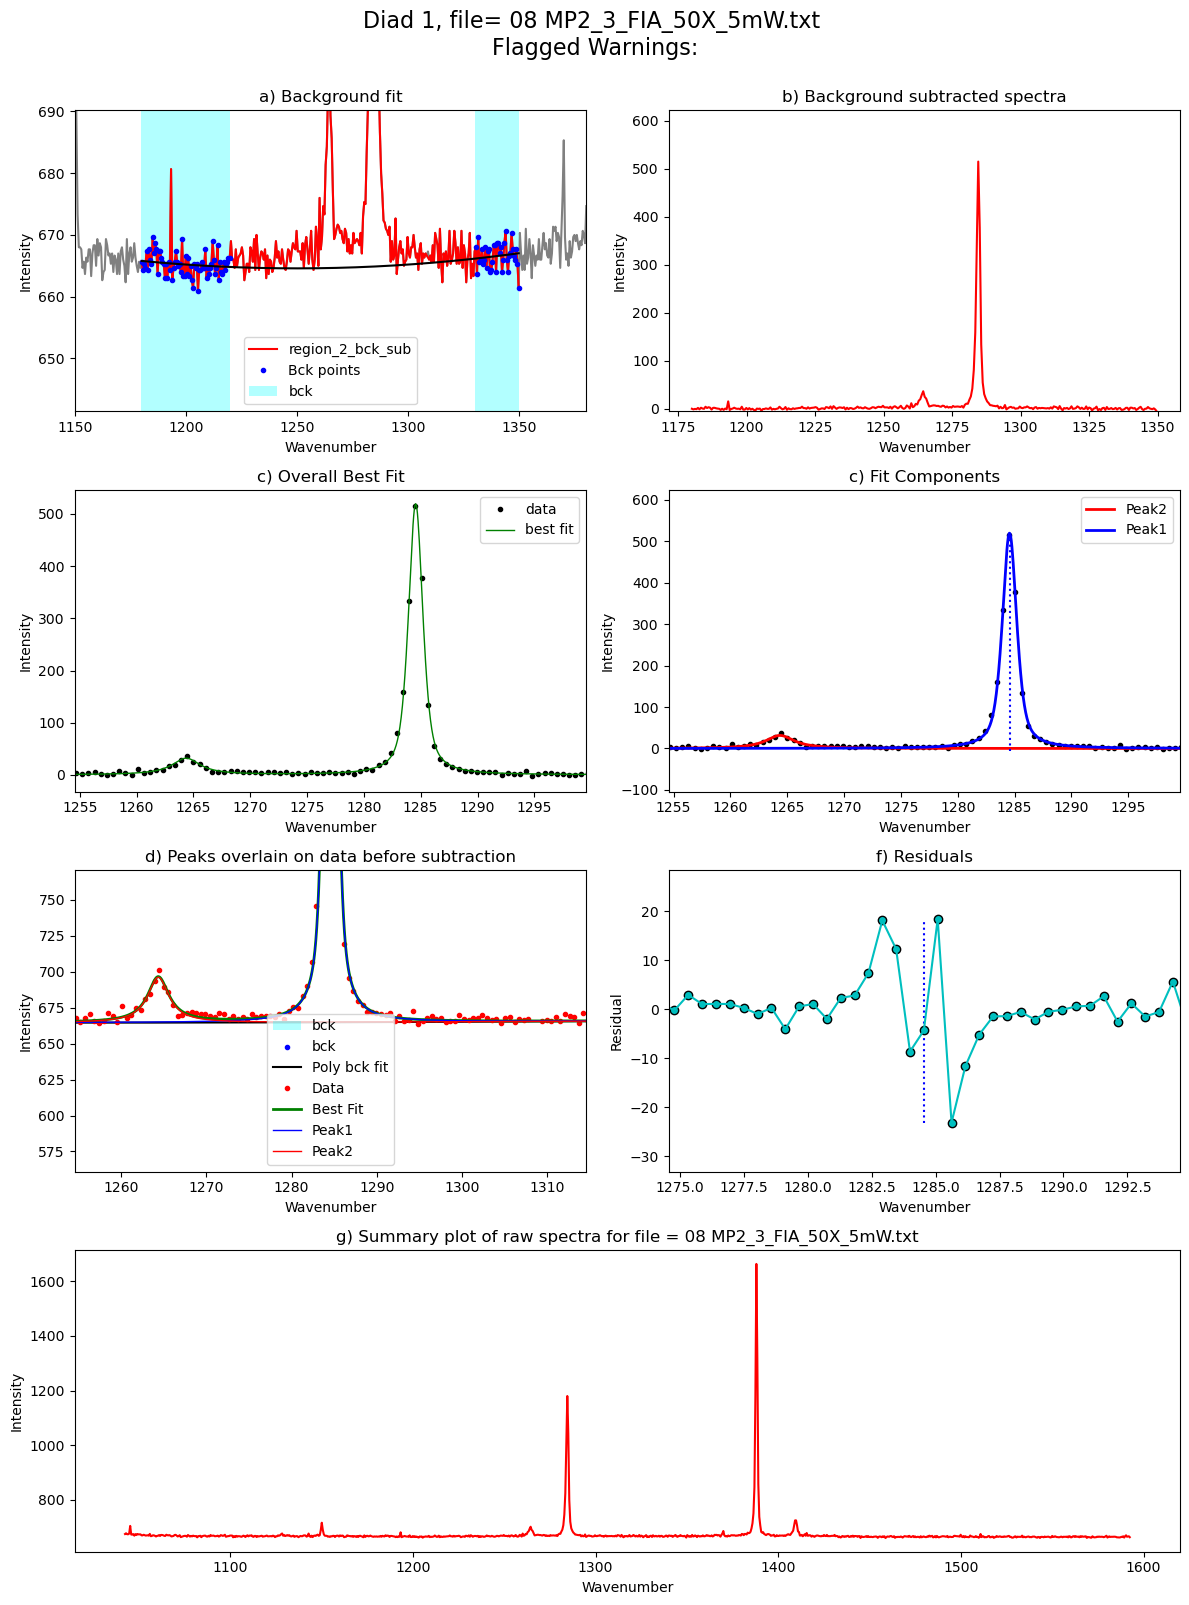

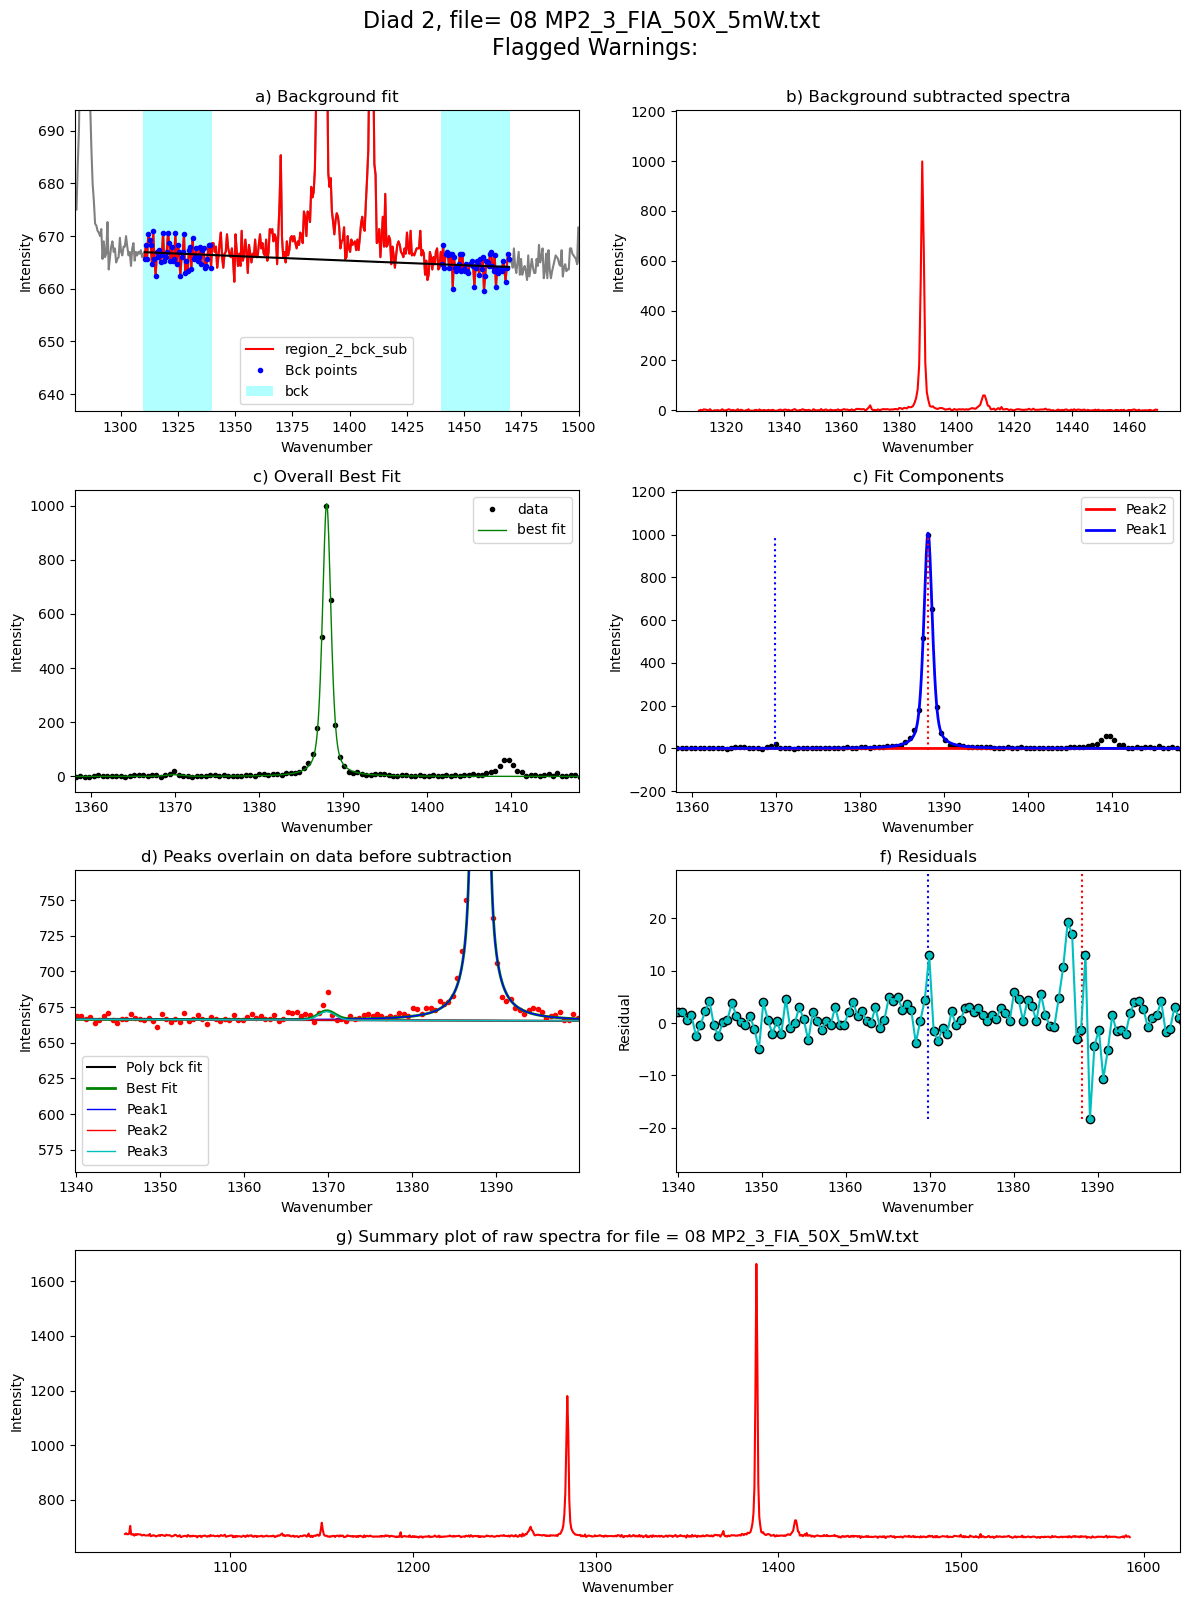

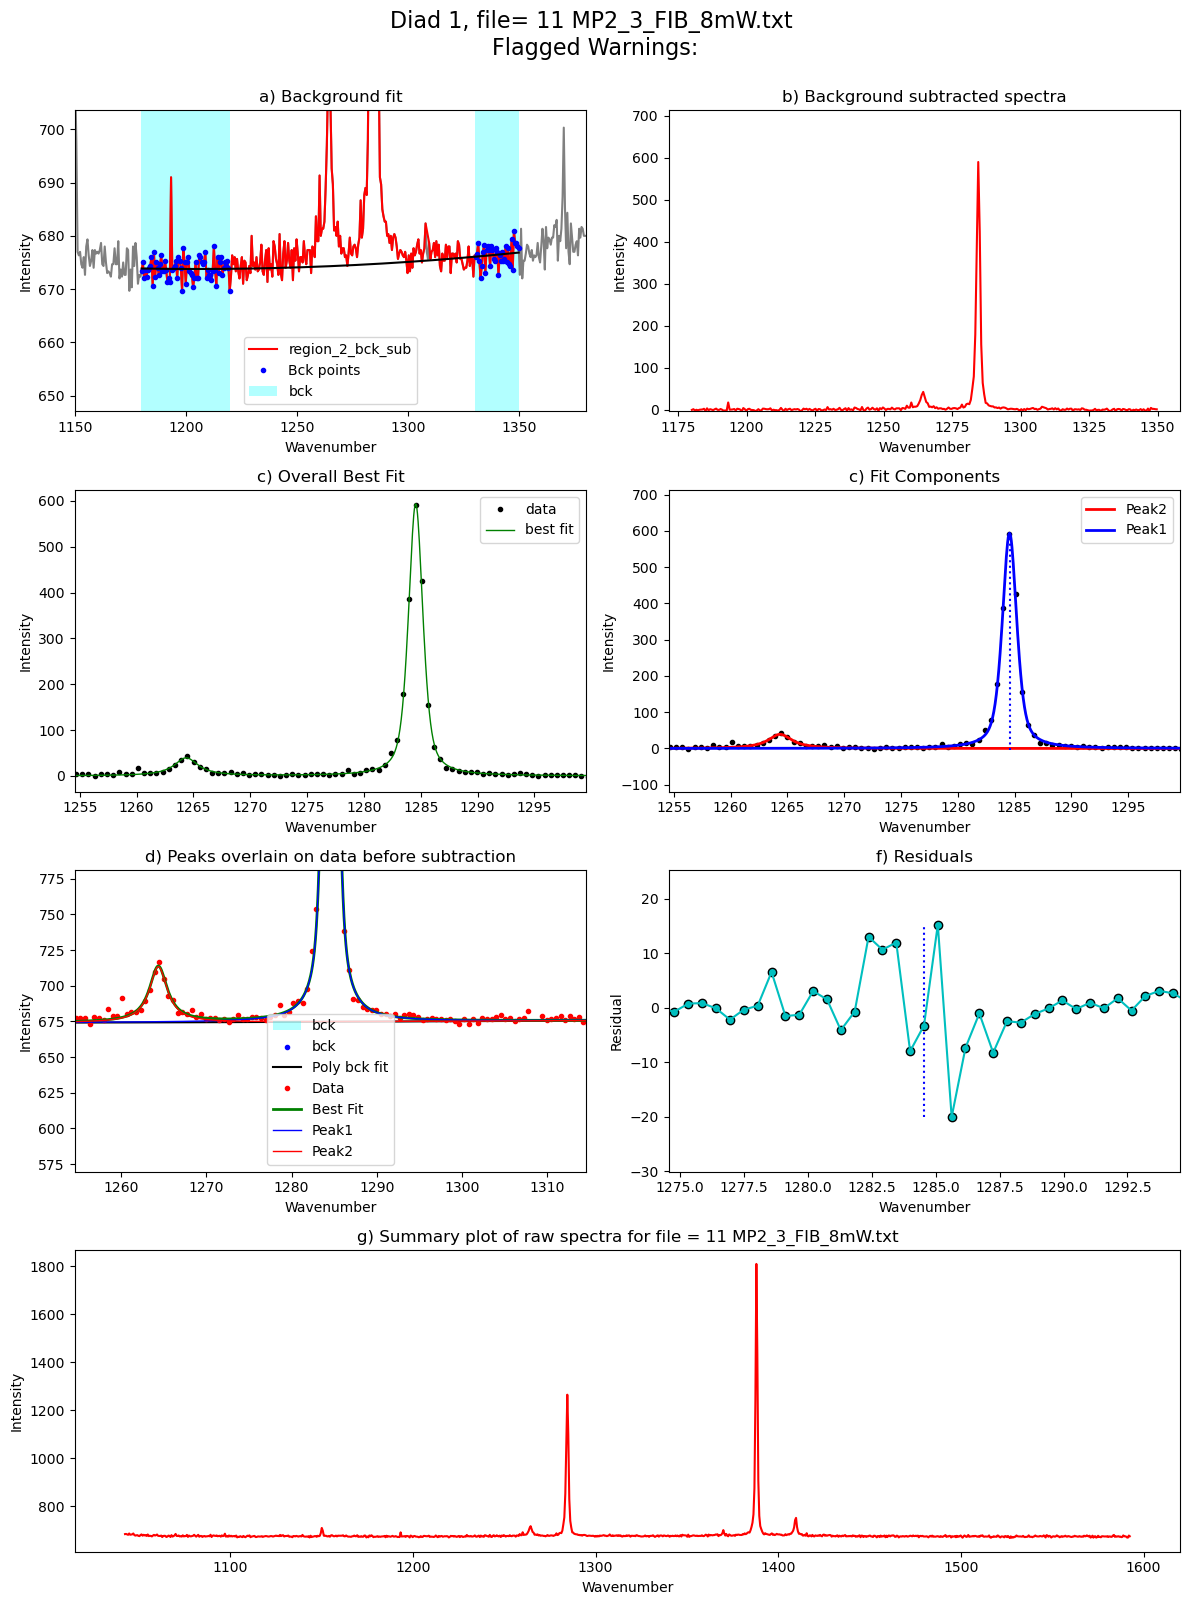

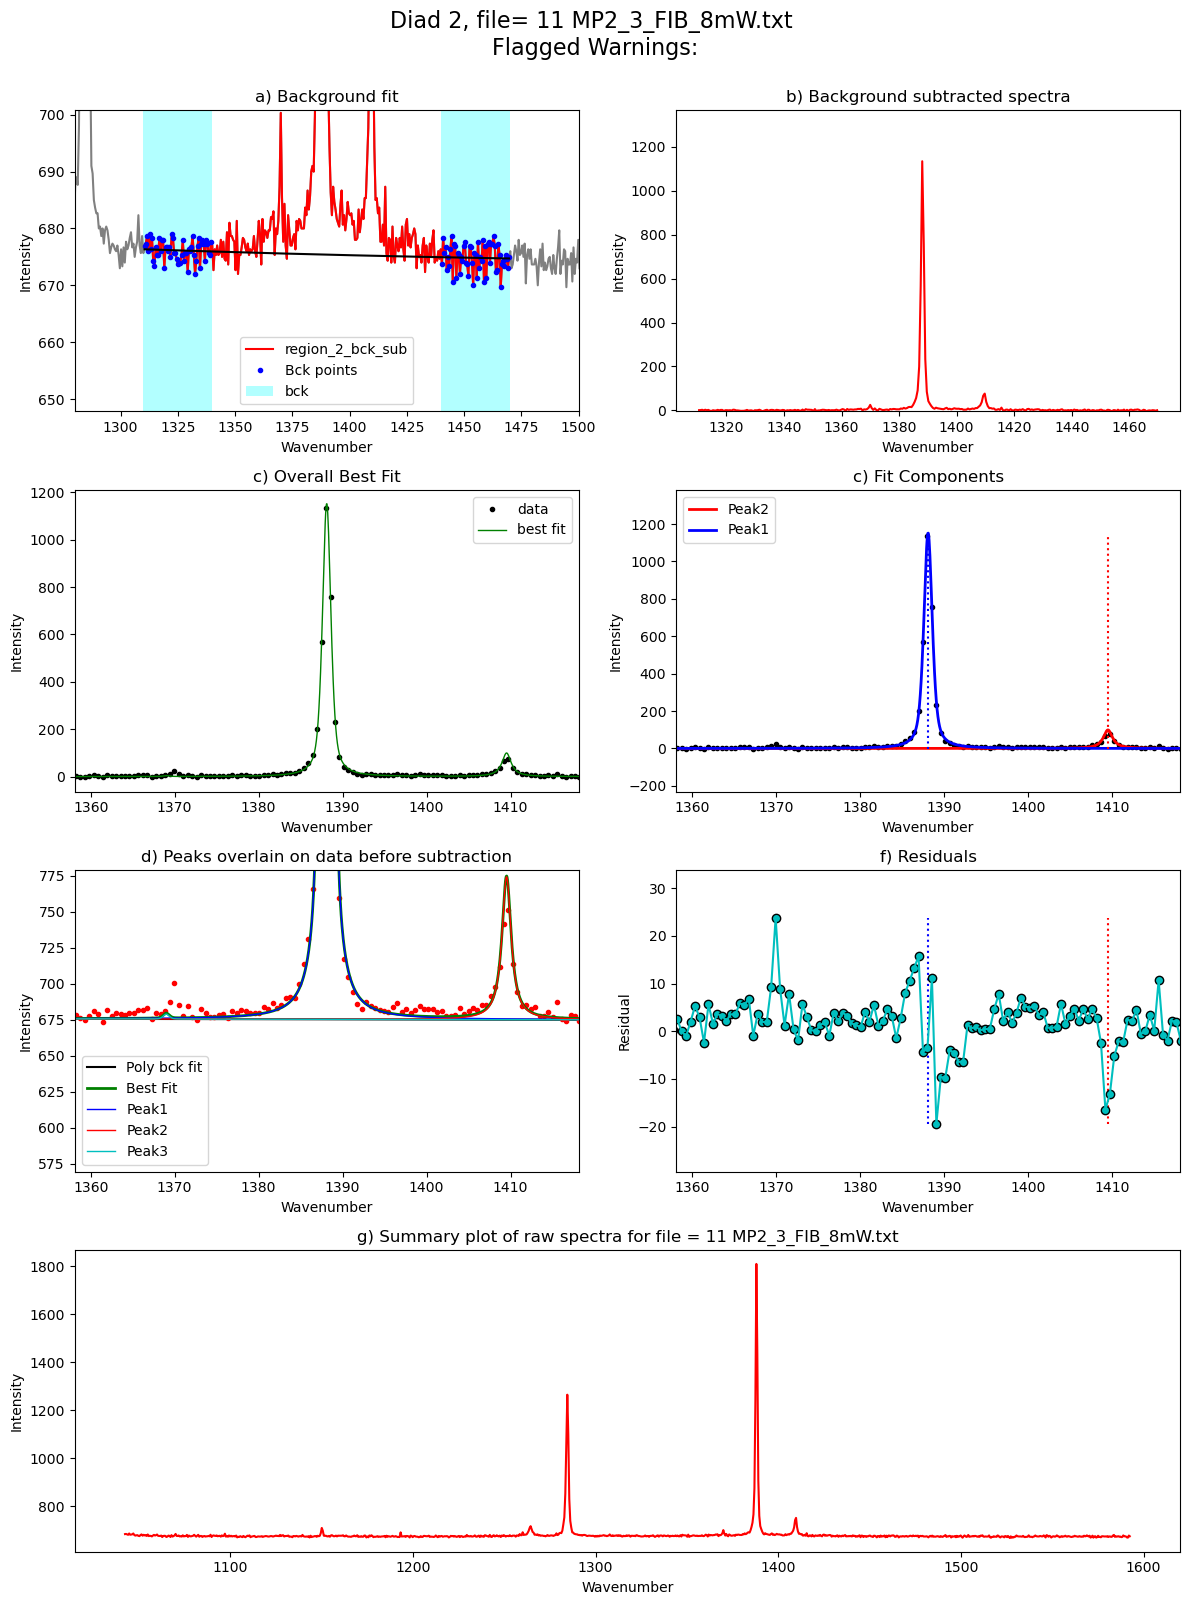

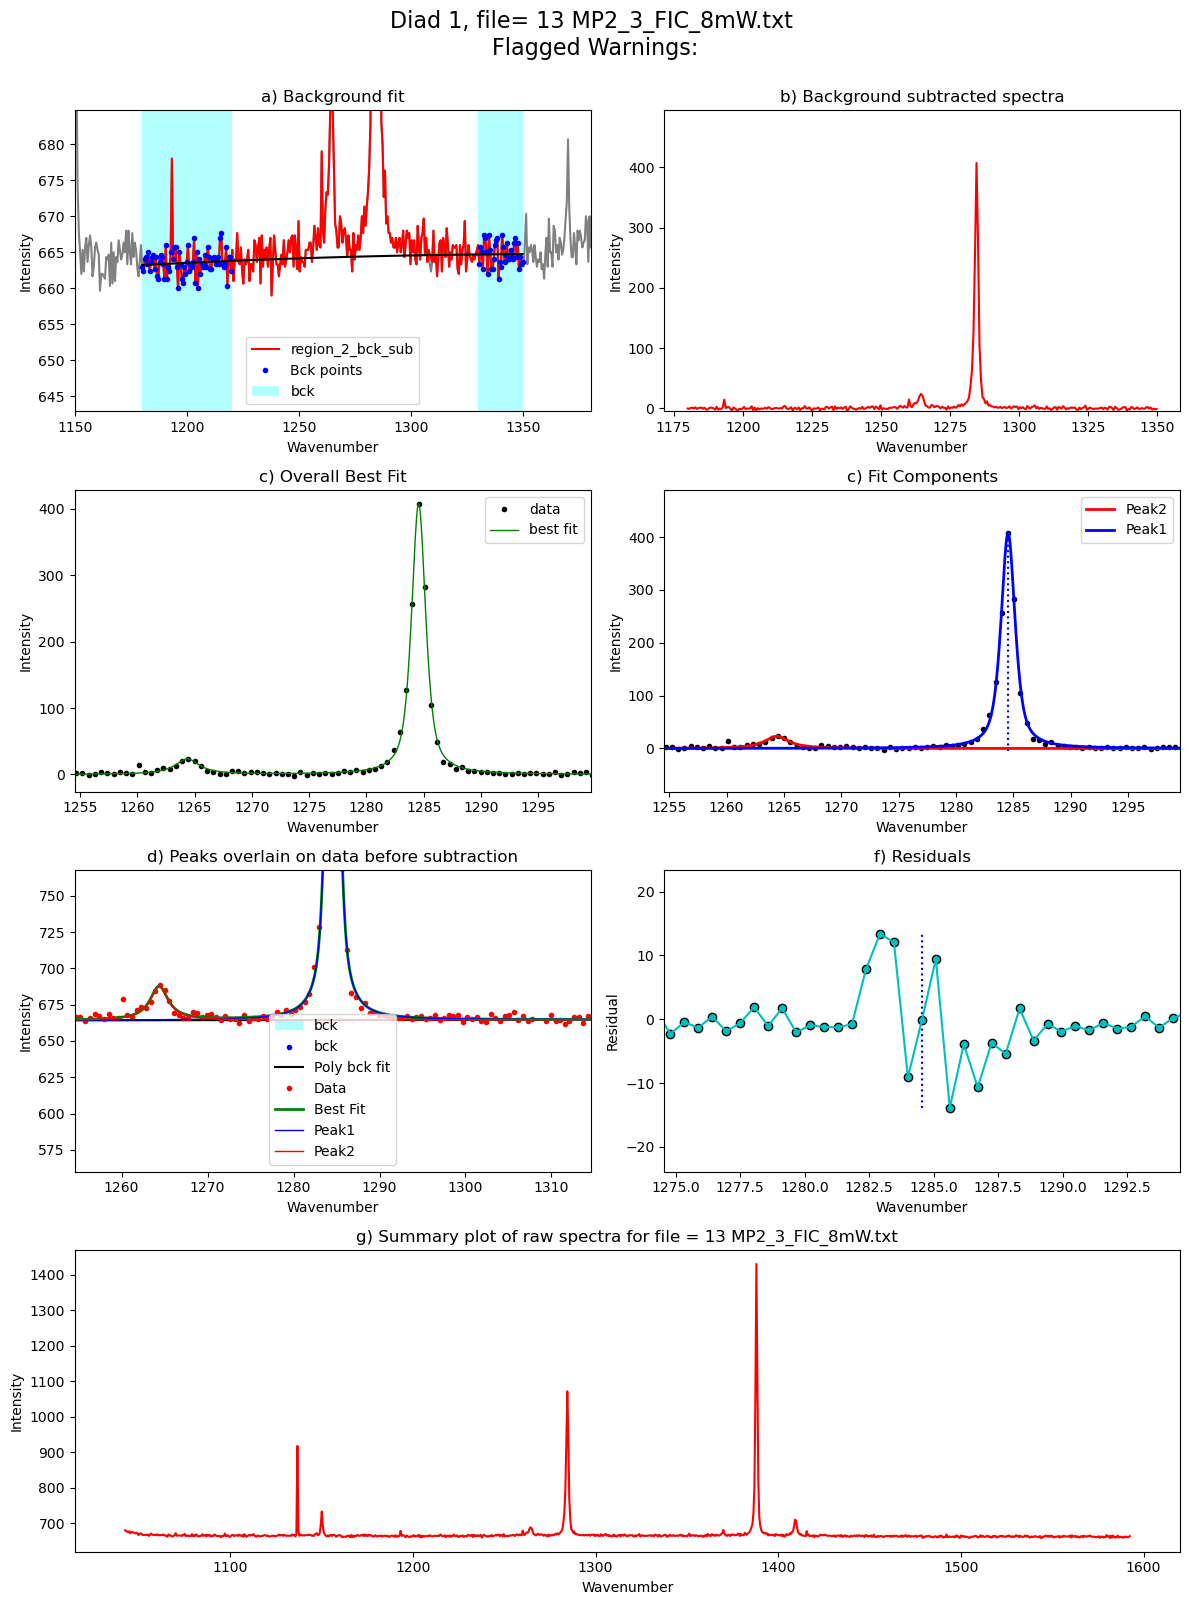

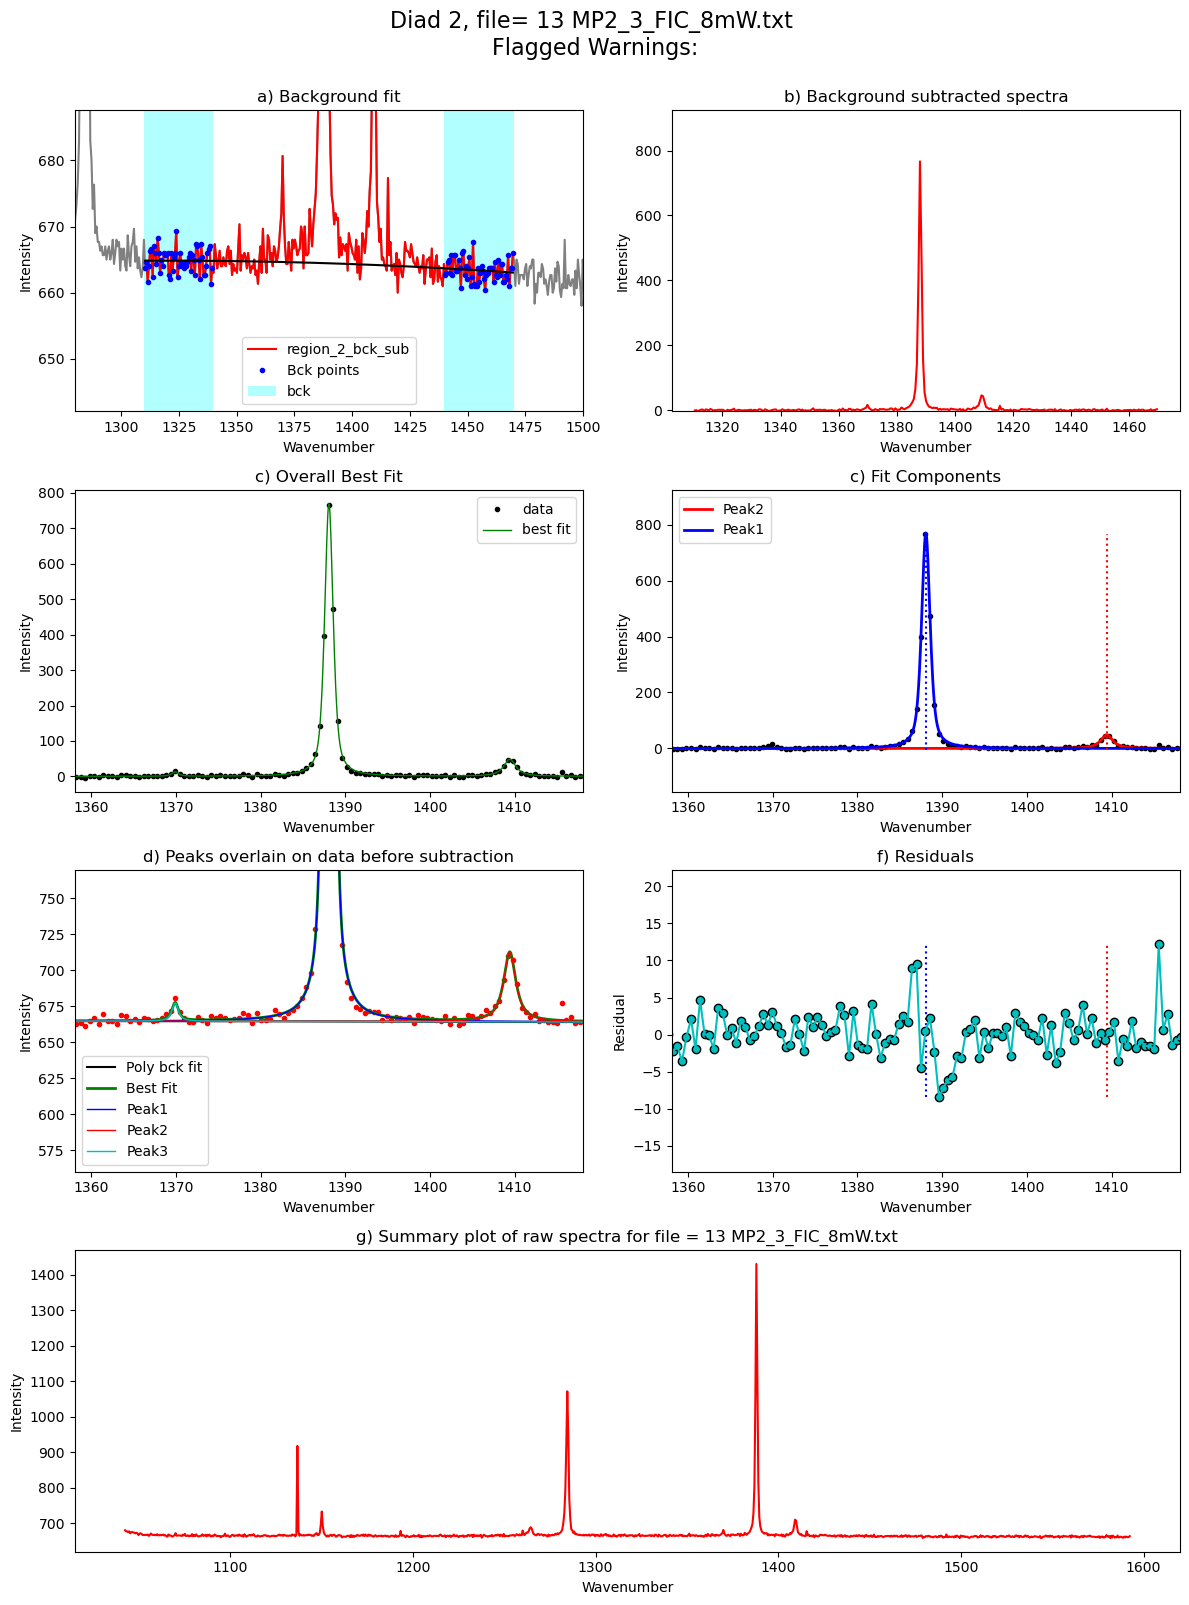

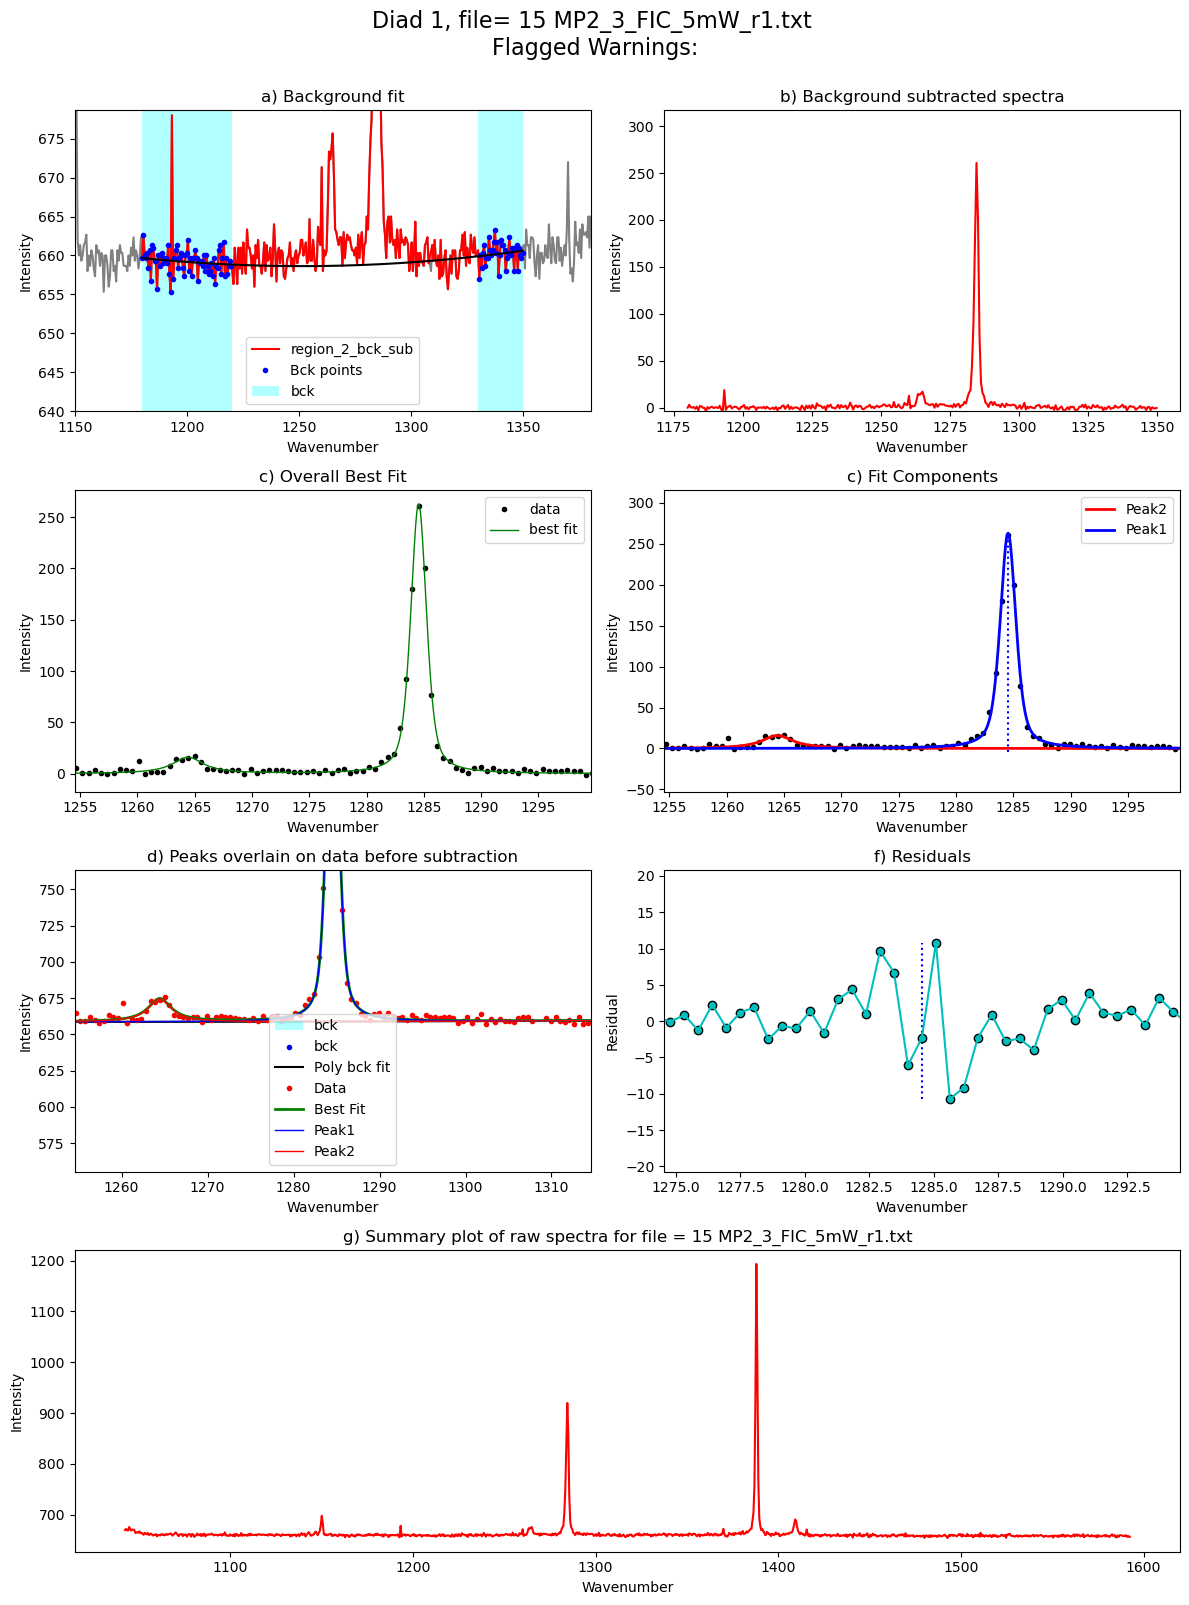

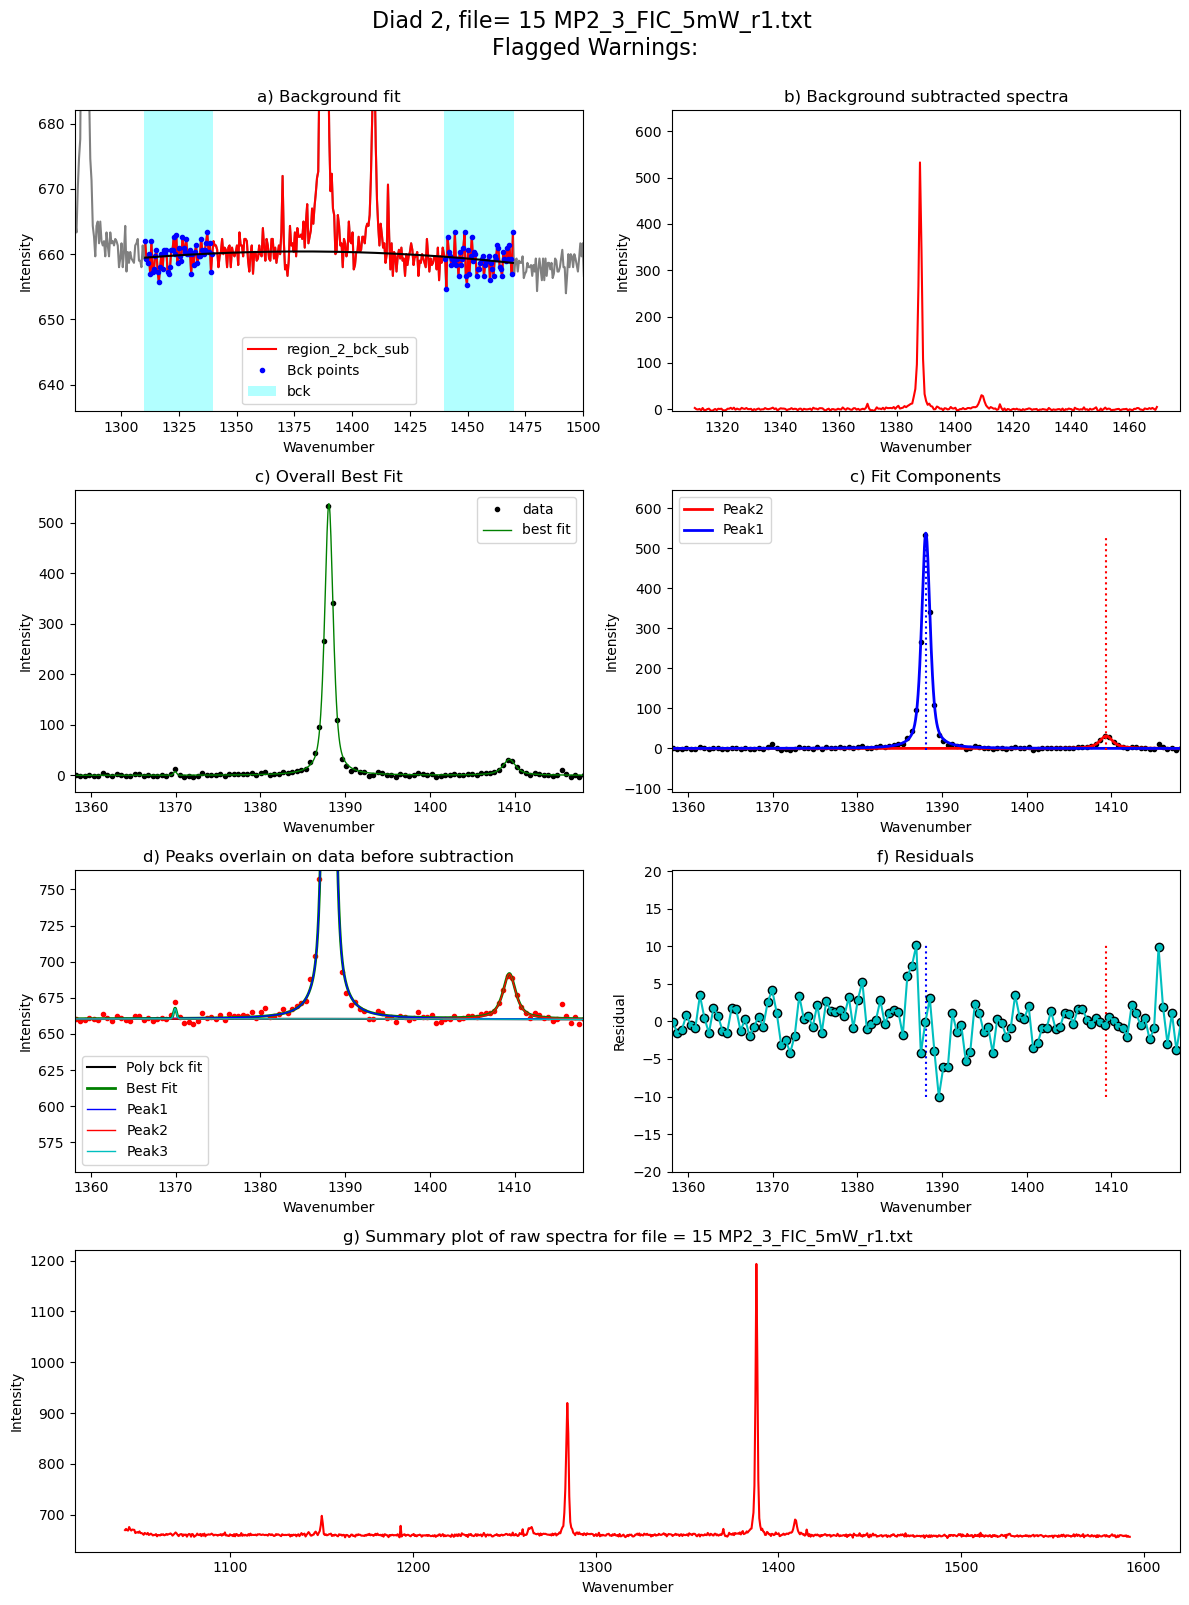

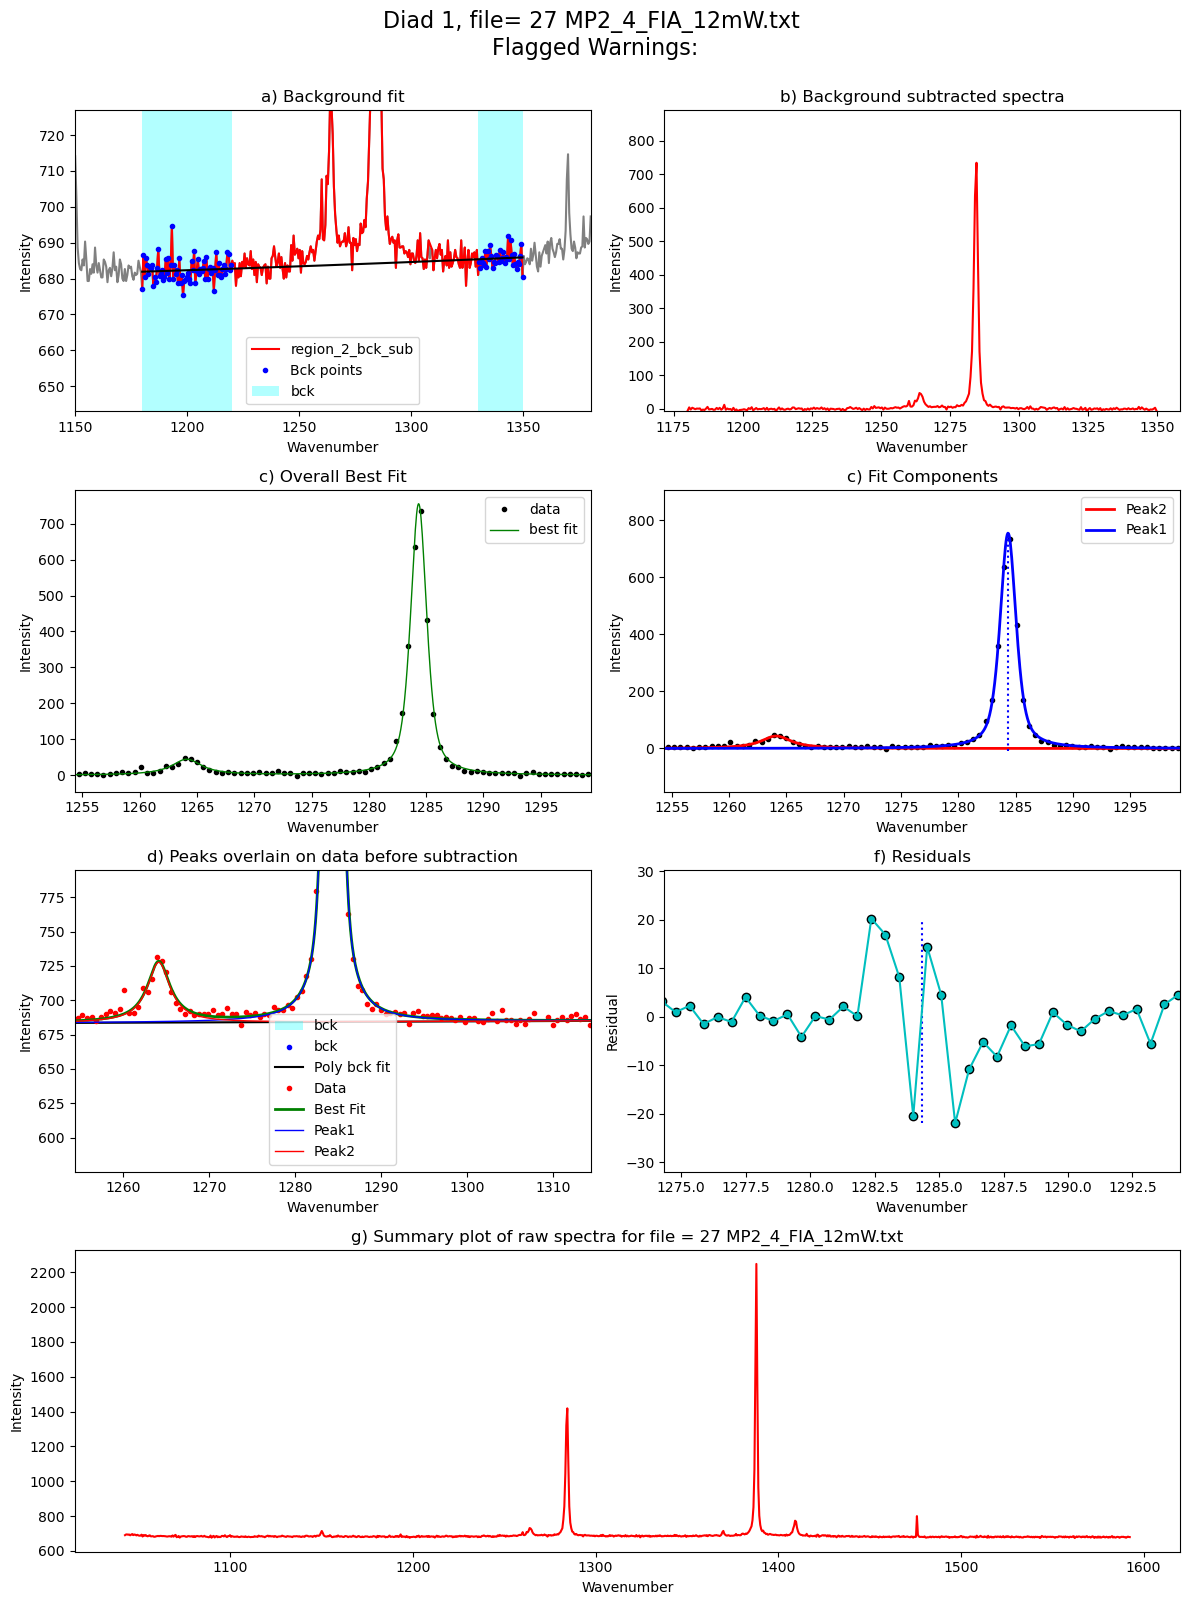

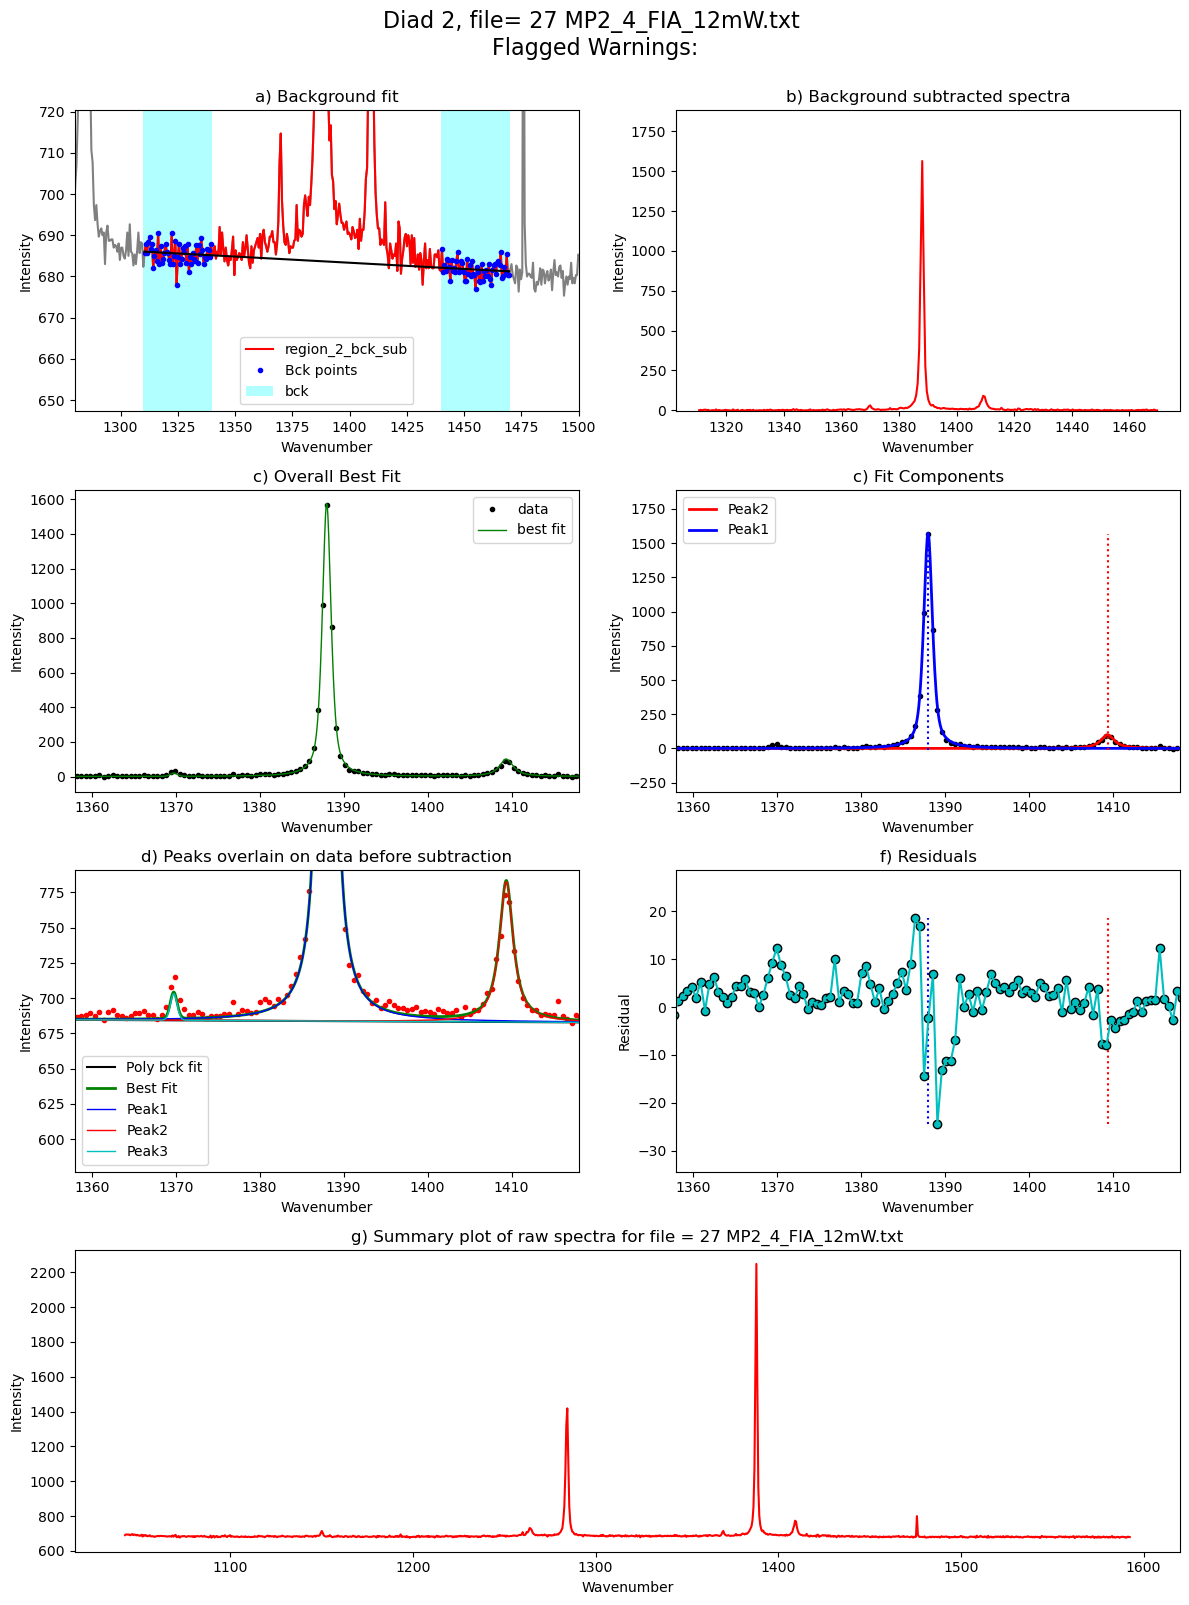

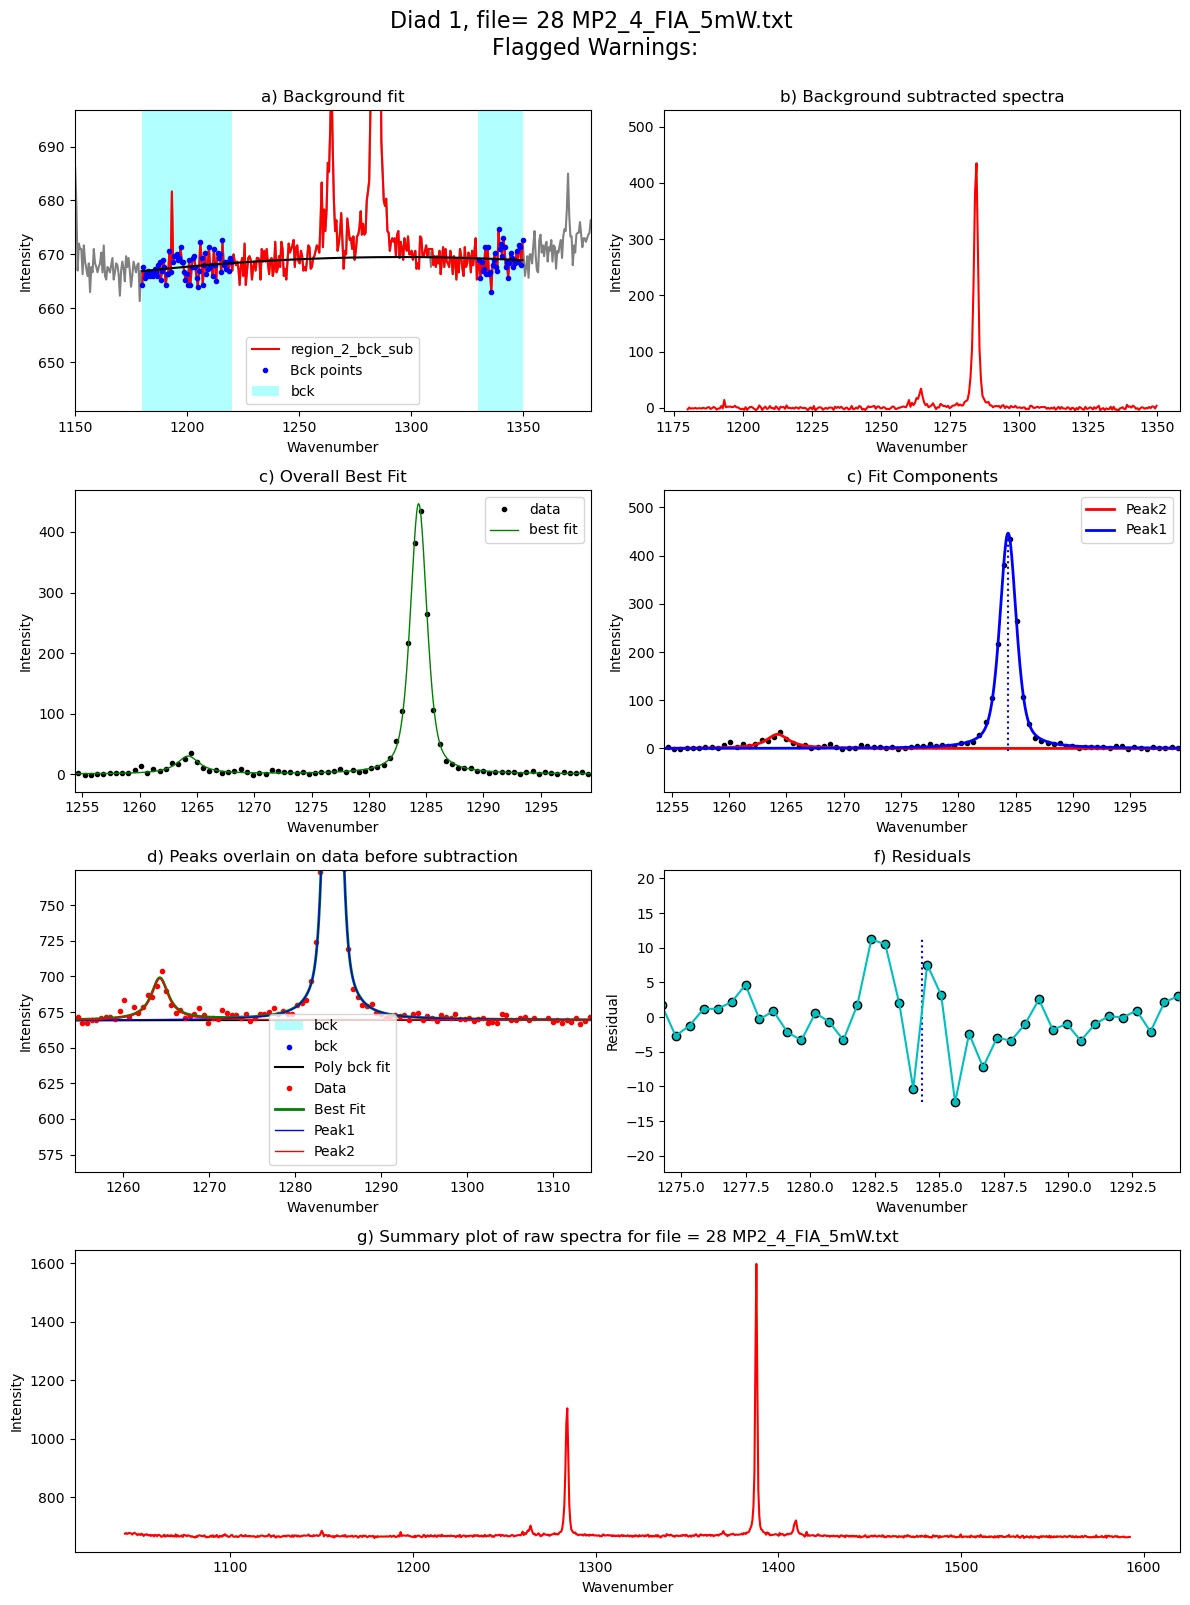

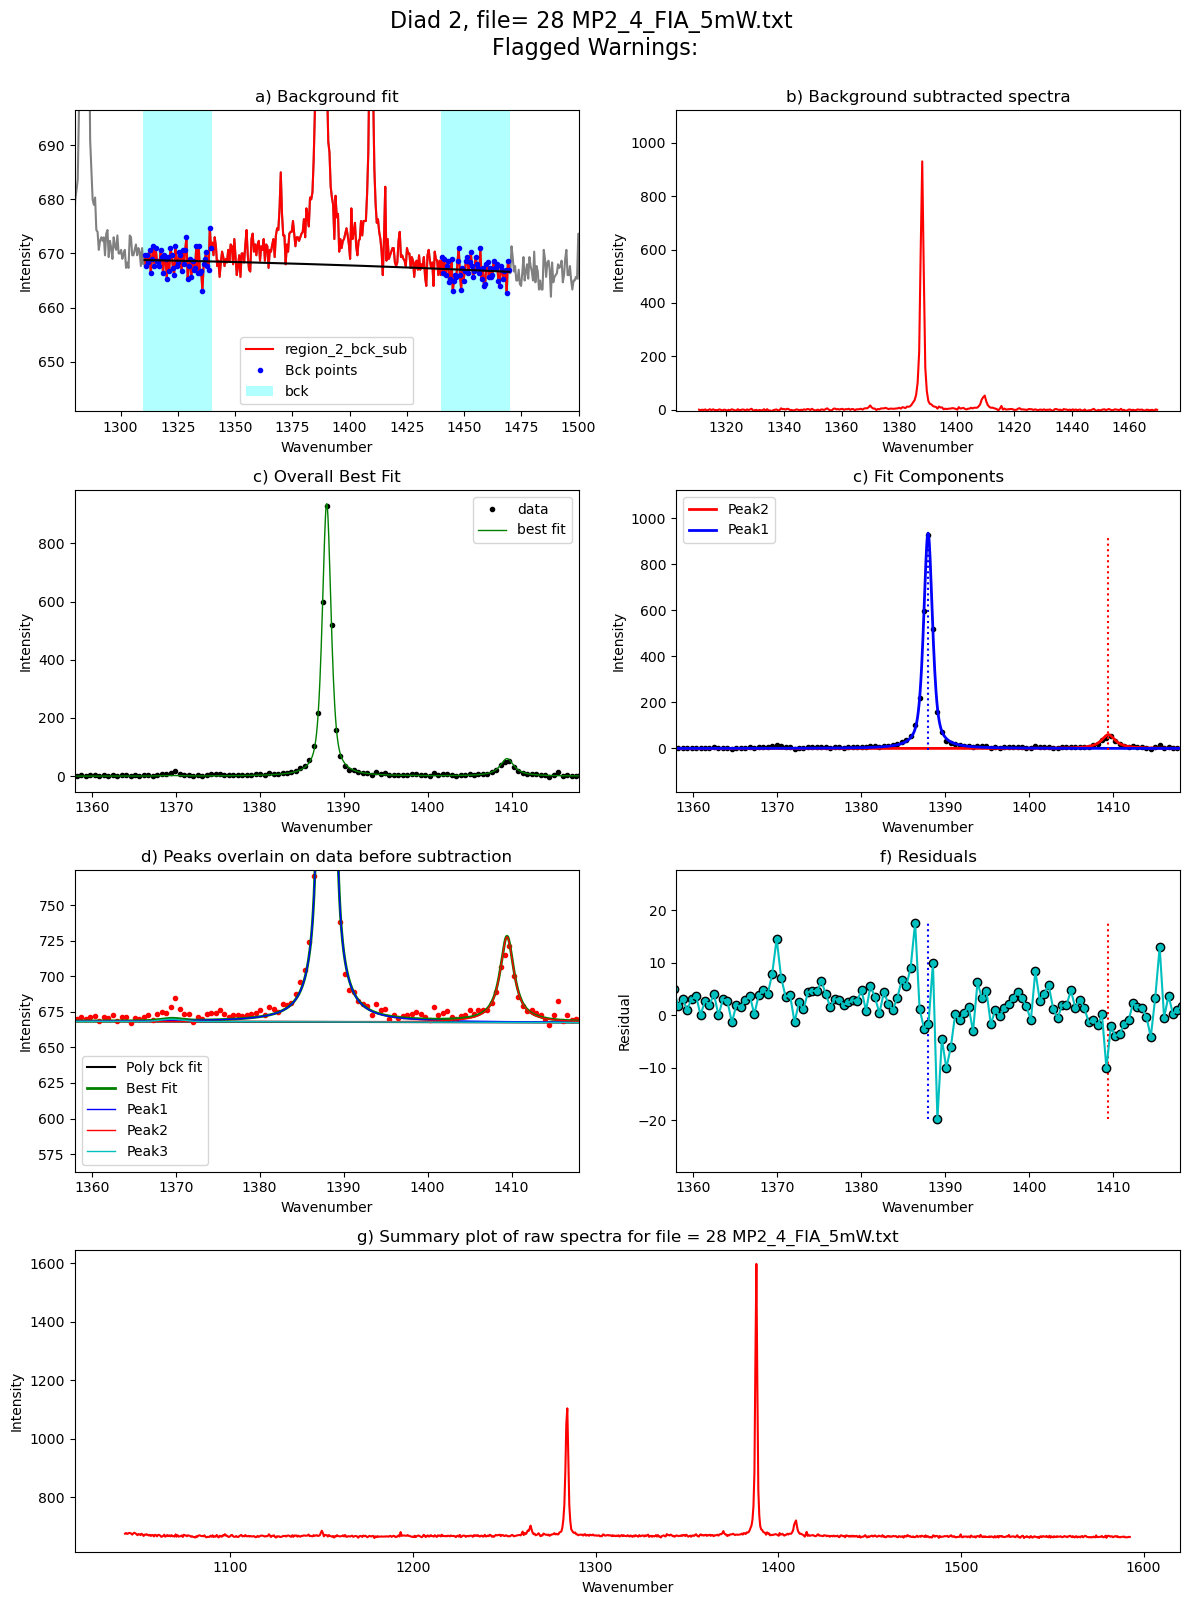

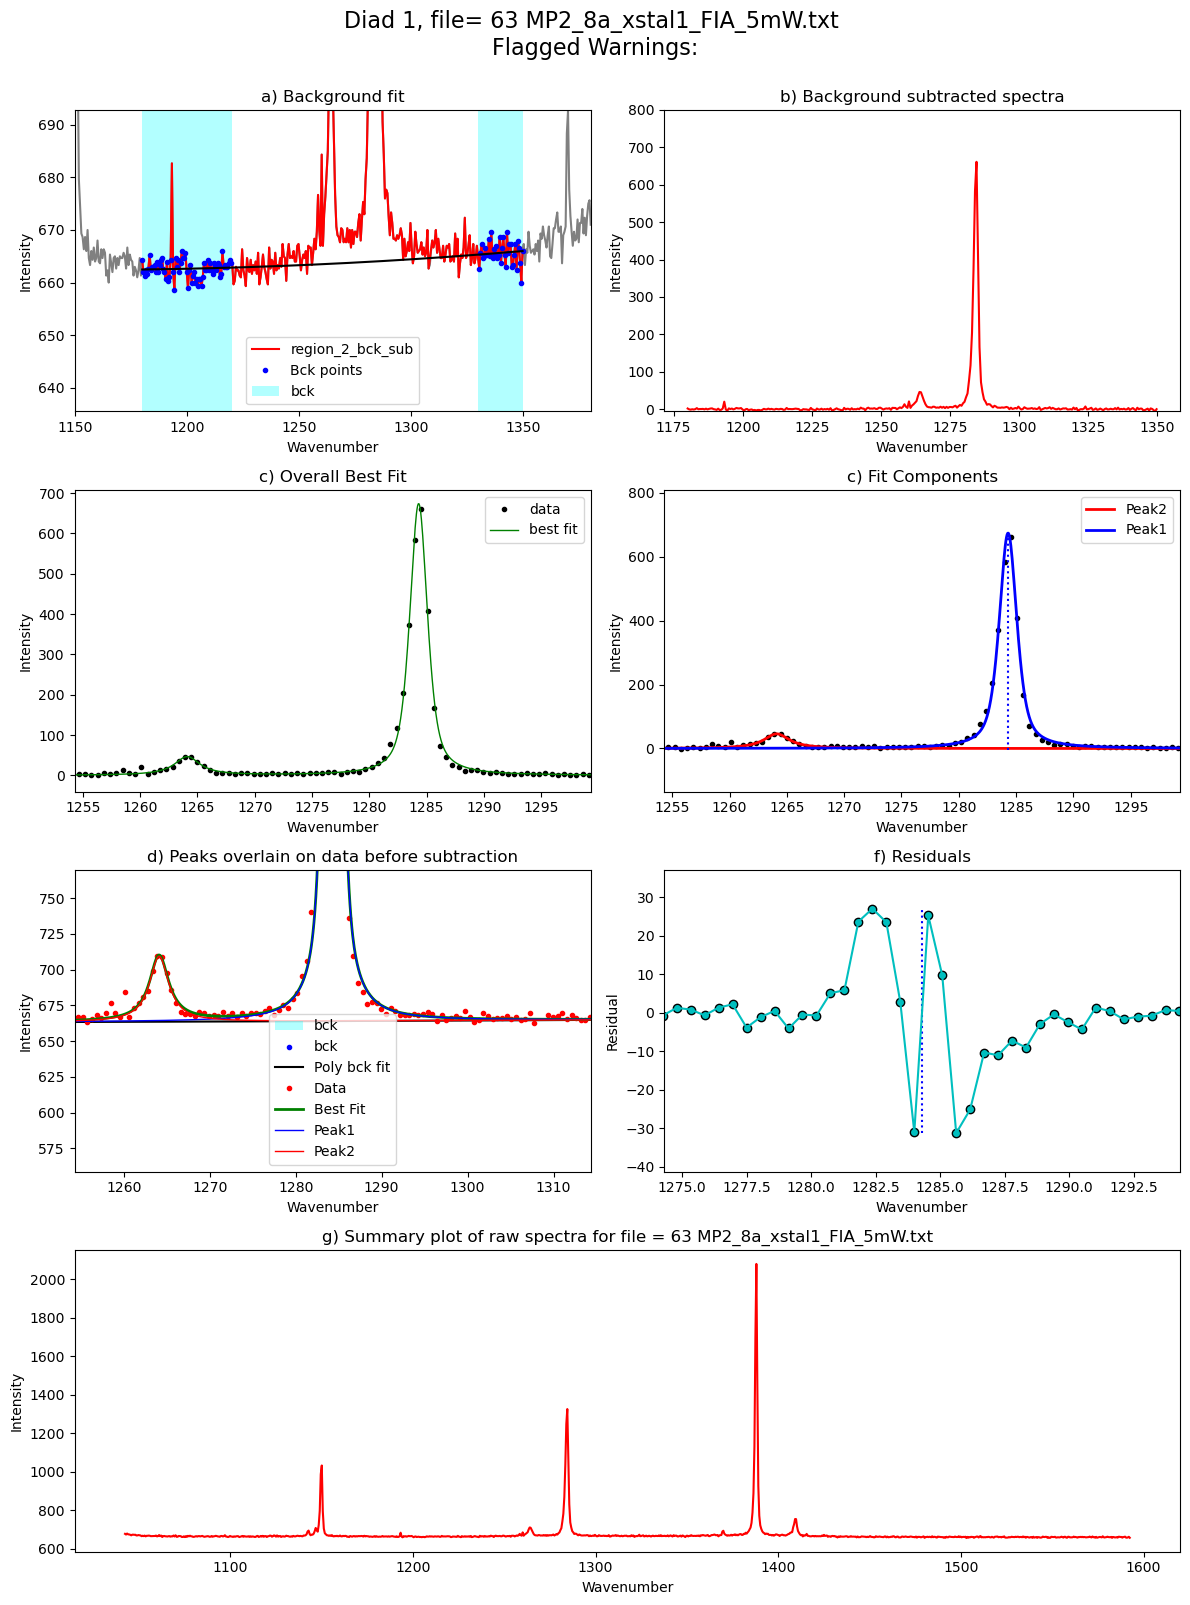

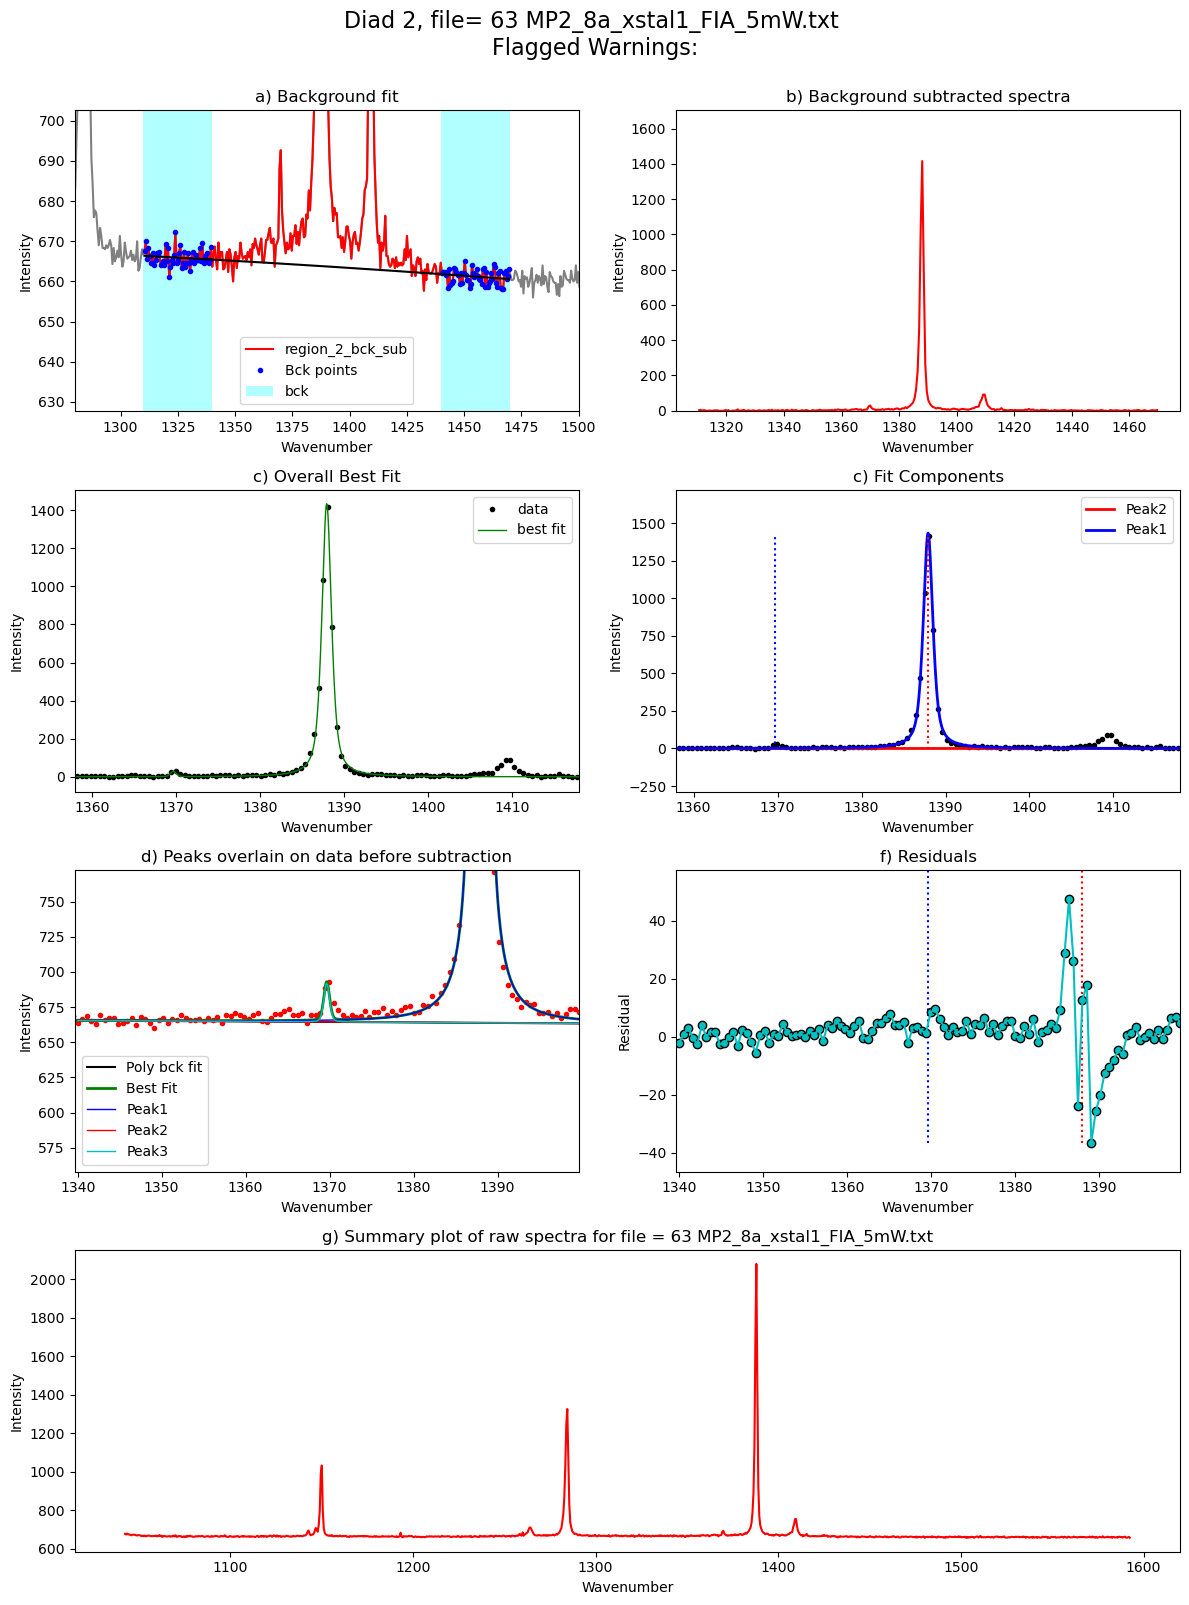

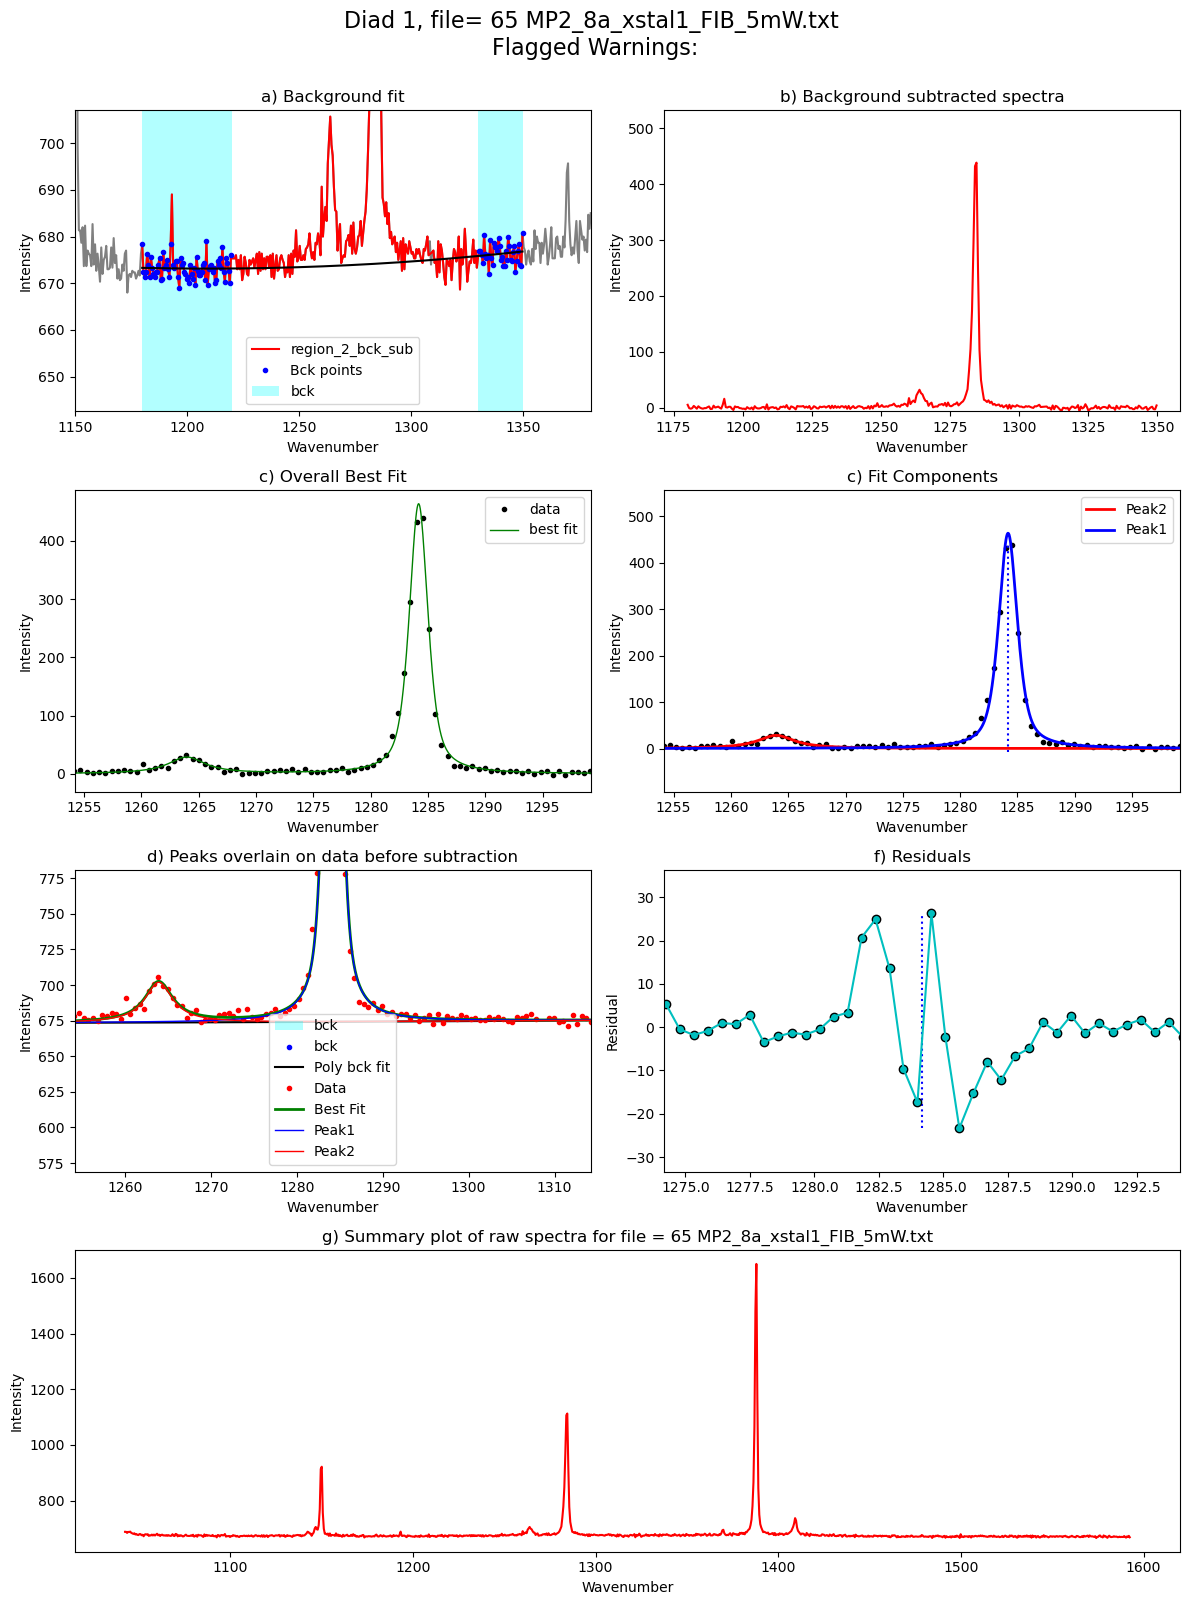

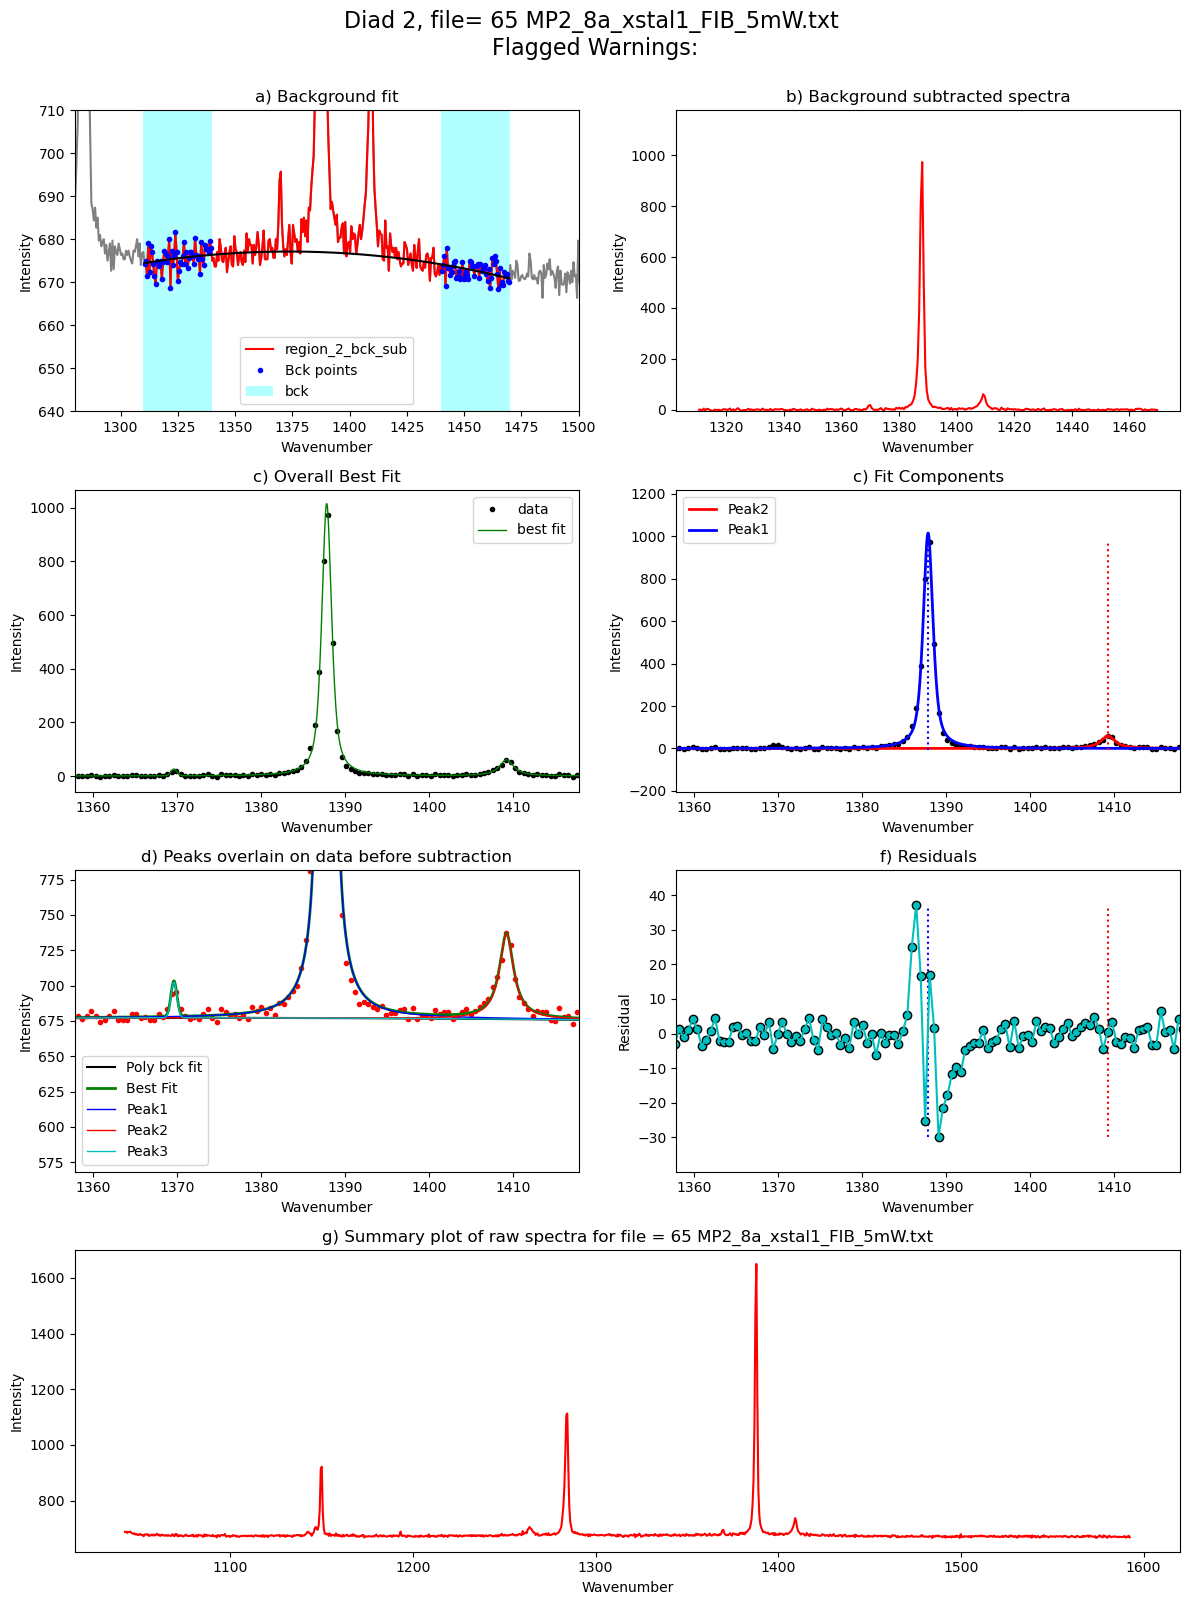

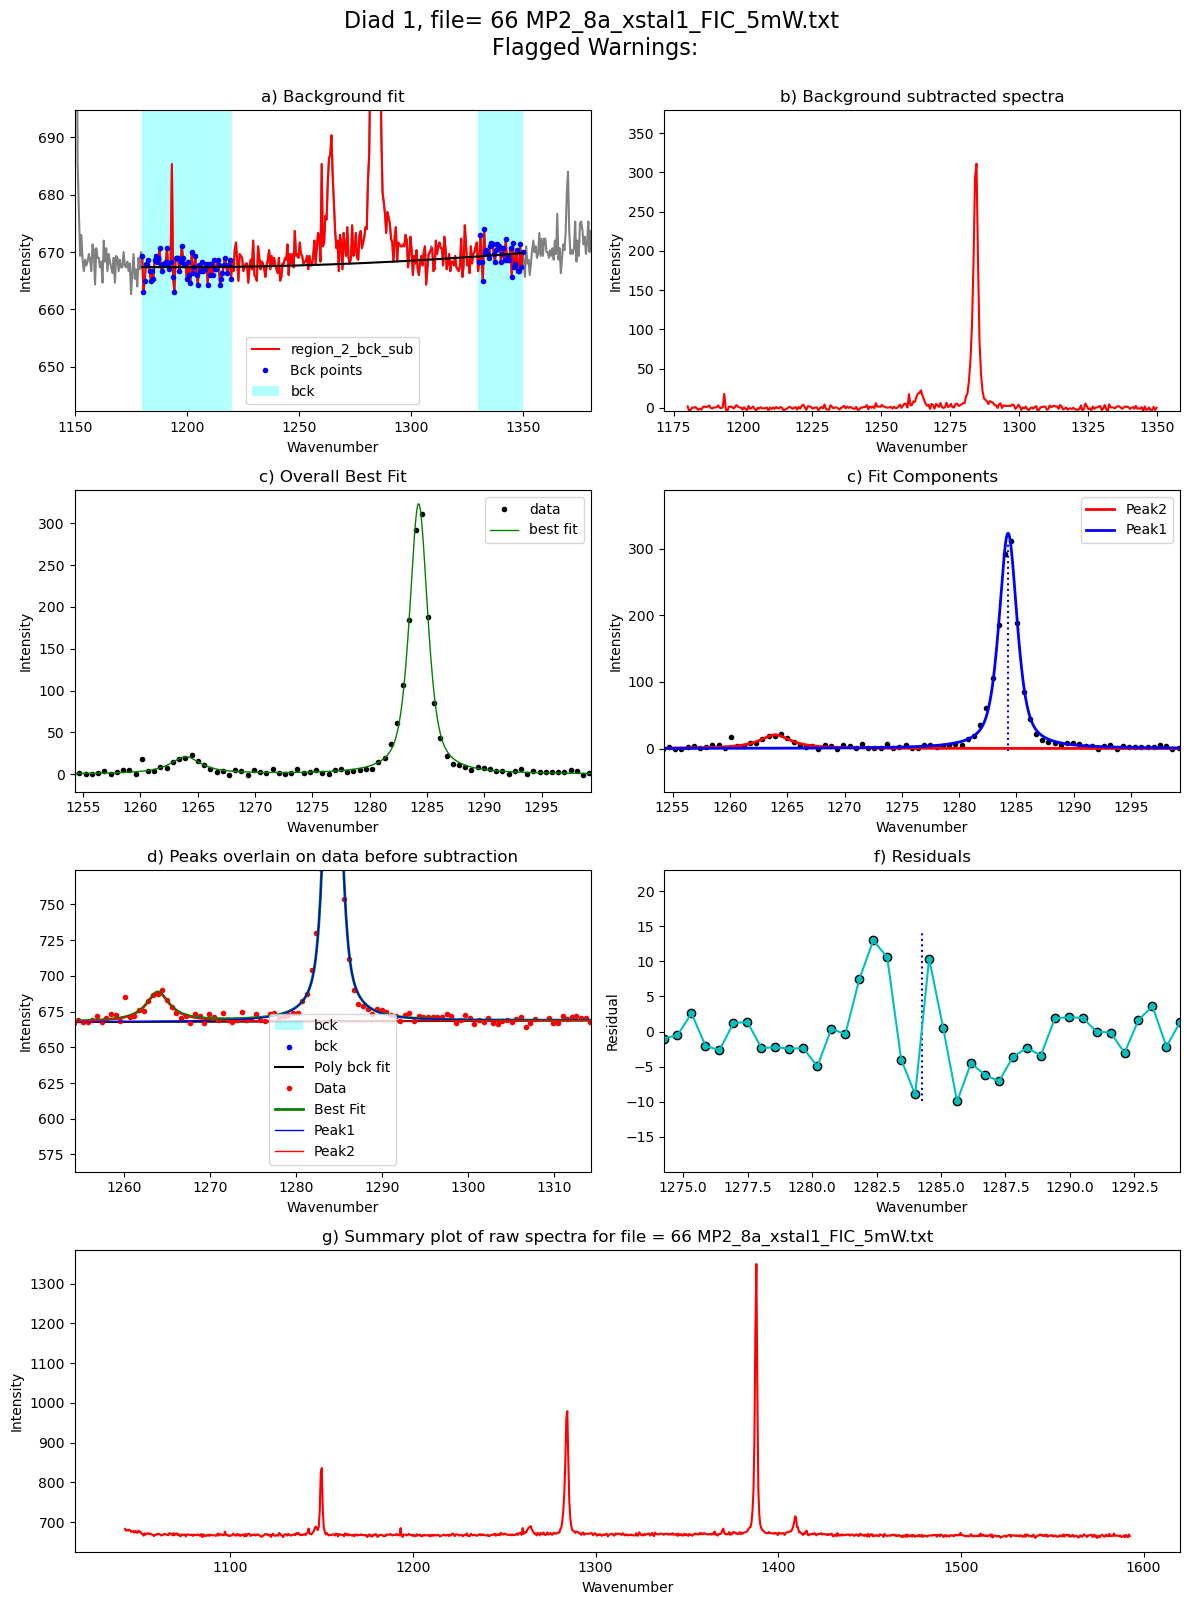

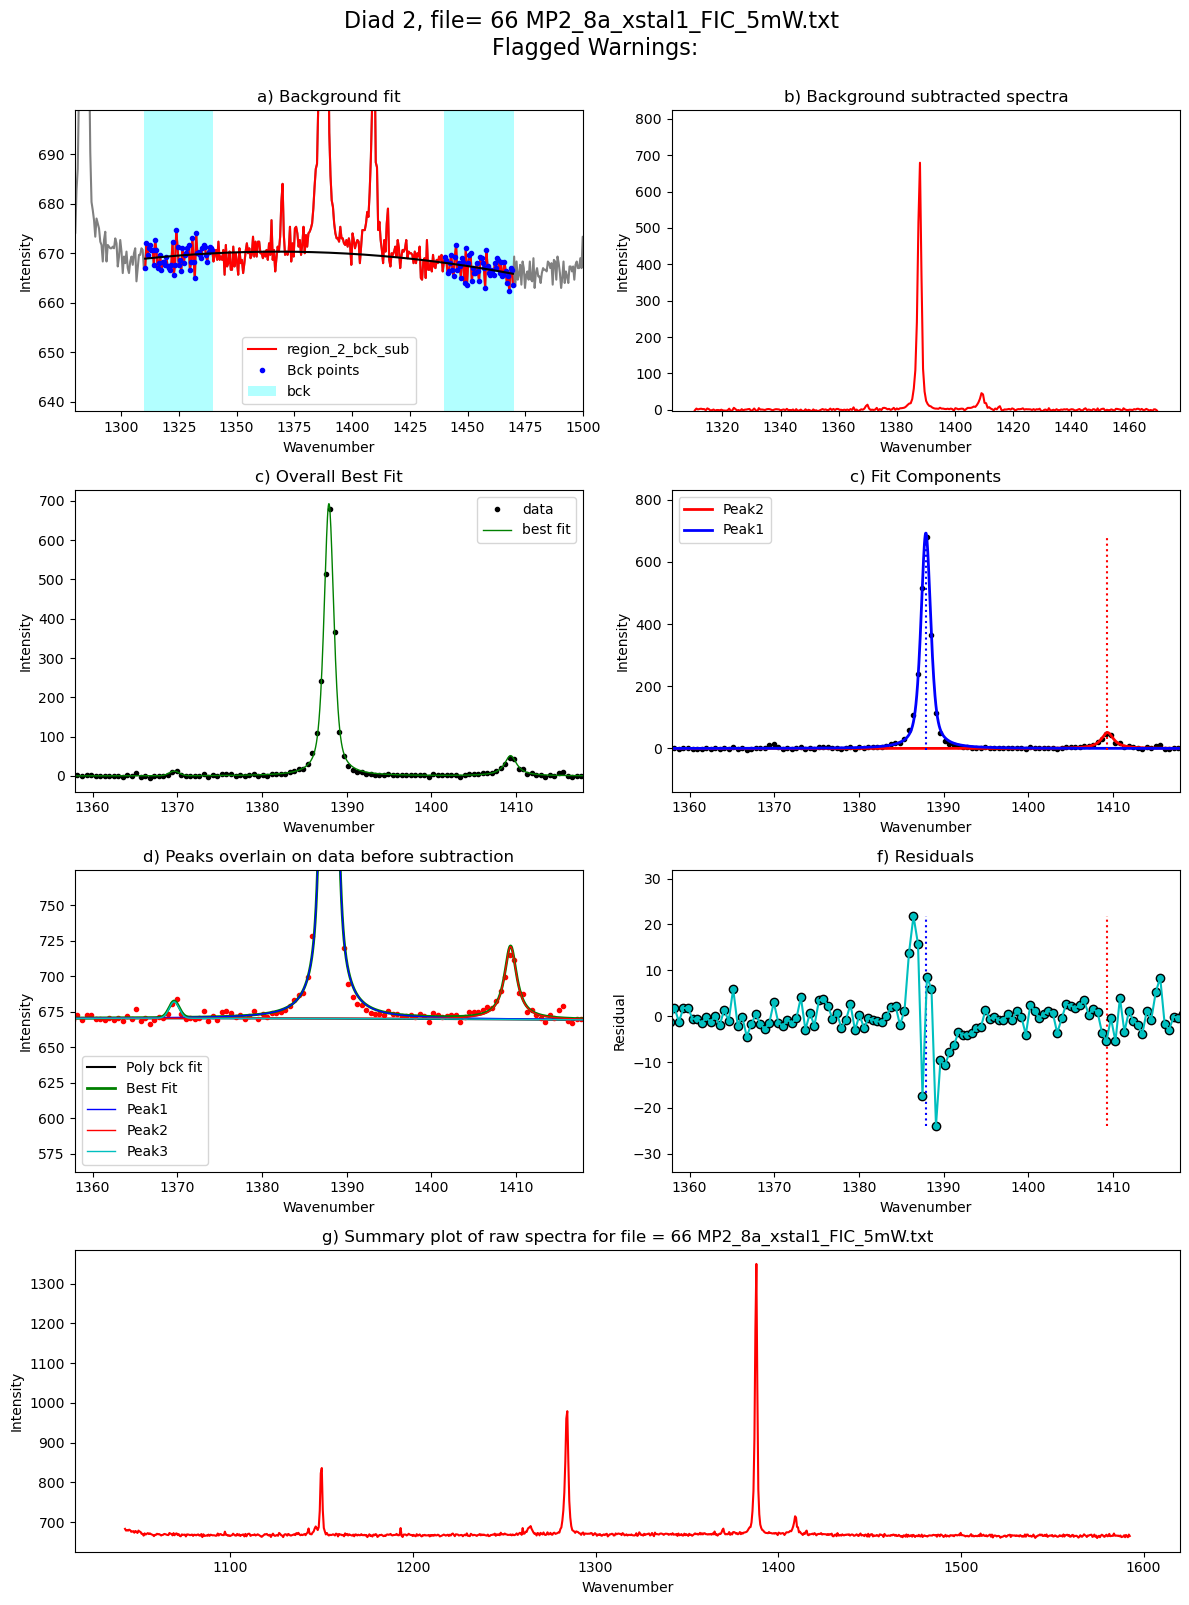

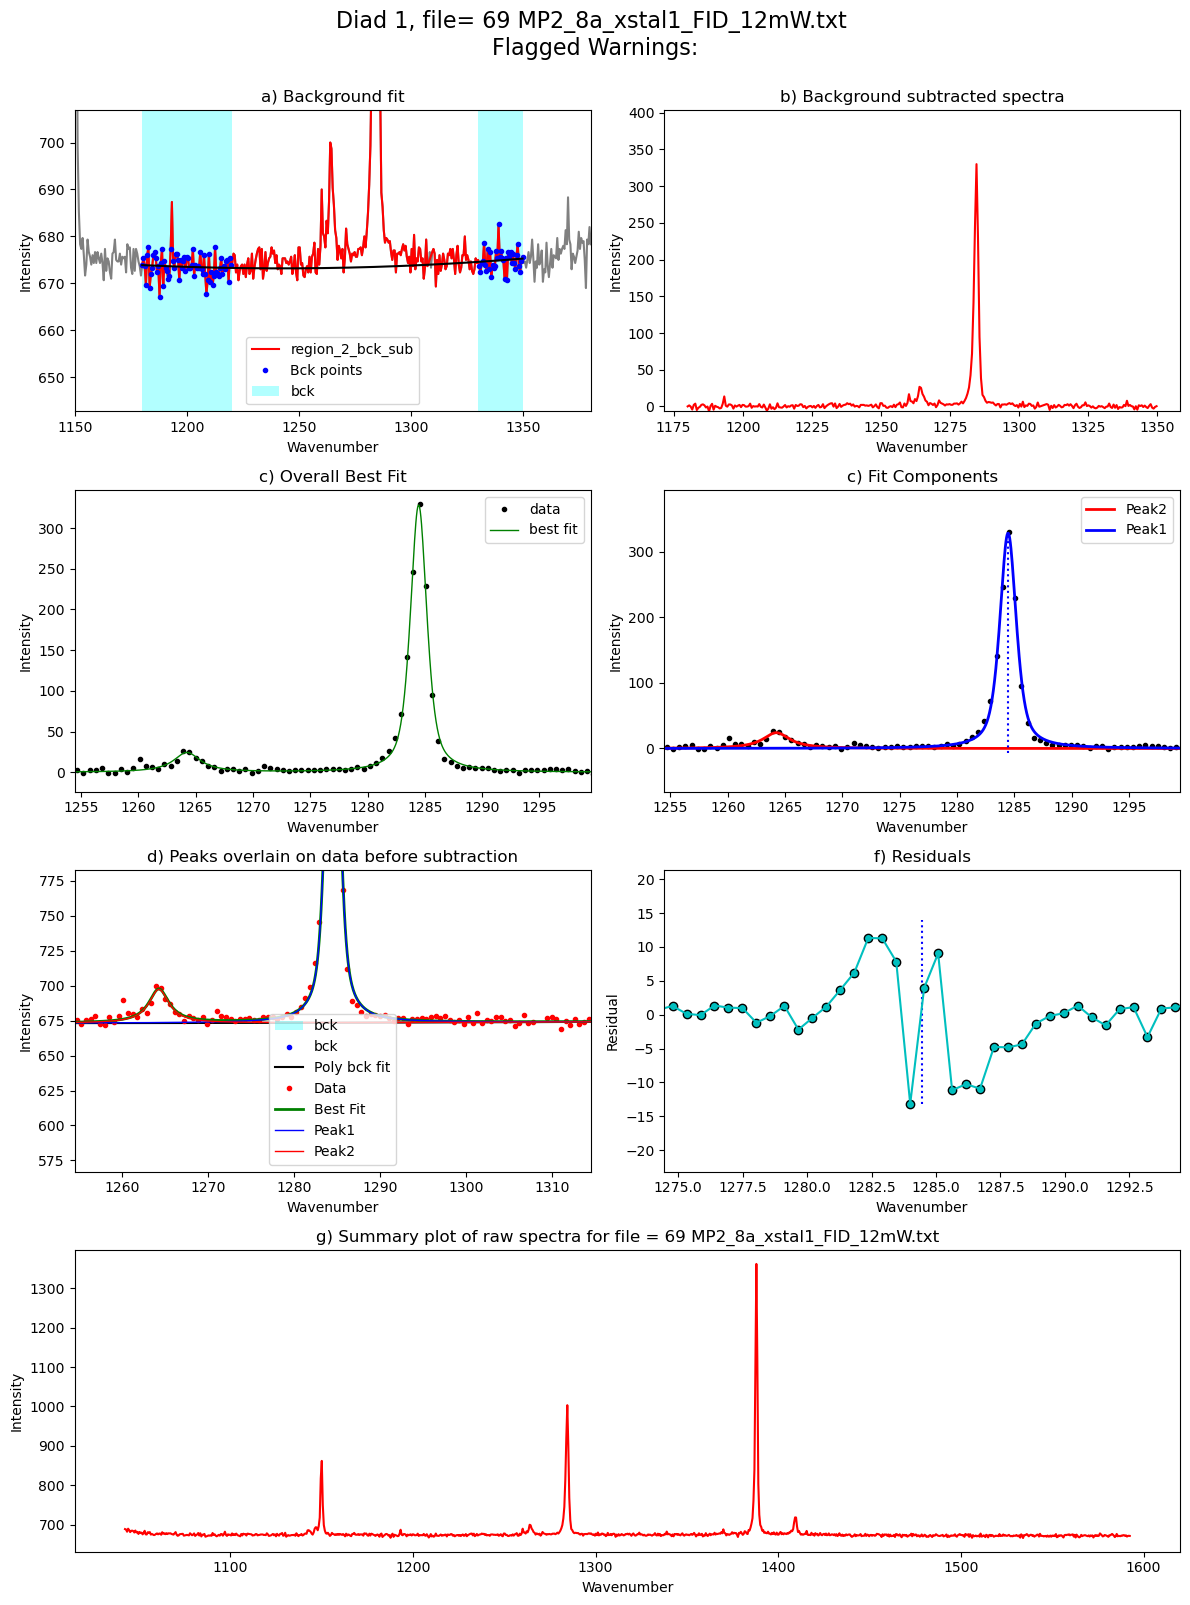

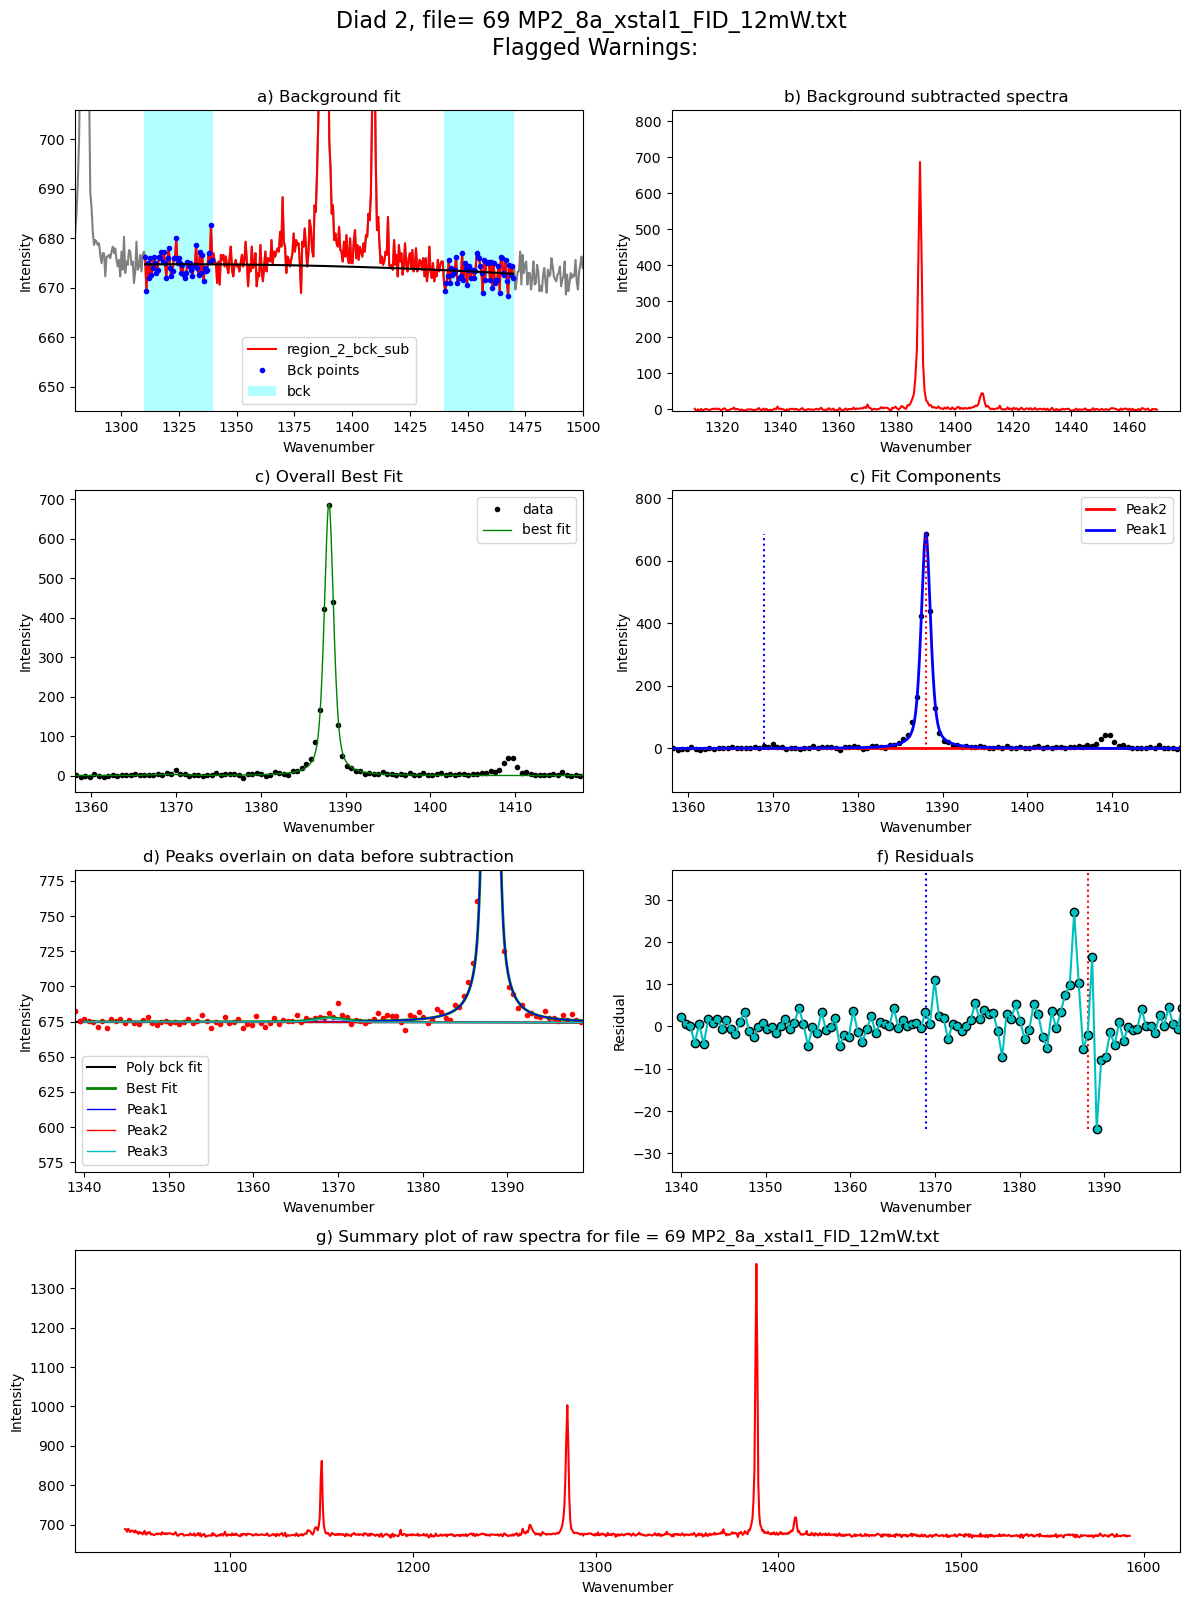

In [36]:
from tqdm import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself
to_clipboard=False # Copies to clipboard
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    
    ## Diad 1 fit

    diad_id_config=pf.diad_id_config(height=50,exclude_range1=[1308, 1309])
    
    diad1_fit_config2.HB_prom=GroupN_df['HB1_prom'].iloc[i]
    diad1_fit_config2.Diad_prom=GroupN_df['Diad1_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=filetype, close_figure=False,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
    



    ## Diad 2
    diad2_fit_config2.HB_prom=GroupN_df['HB2_prom'].iloc[i]
    diad2_fit_config2.Diad_prom=GroupN_df['Diad2_prom'].iloc[i]
    diad2_fit_config2.gauss_amp= 2*GroupN_df['HB2_prom'].iloc[i]
    diad2_fit_config2.C13_prom=GroupN_df['C13_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config2,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=filetype,
    close_figure=False, Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    


 
    fit_sec_peak=False

    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,
     to_clipboard=to_clipboard,                    
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0)


## EXport file names that still arent happy

In [37]:
refit_d1=(df_Merge['Diad1_refit']!='Flagged Warnings:')
refit_d2=(df_Merge['Diad2_refit']!='Flagged Warnings:')# (df_Merge['Diad2_refit']==True)
refit=refit_d1|refit_d2
print(sum(refit))
refit_names_1=df_Merge['filename'].loc[refit]
print(refit_names_1)

0
Series([], Name: filename, dtype: object)


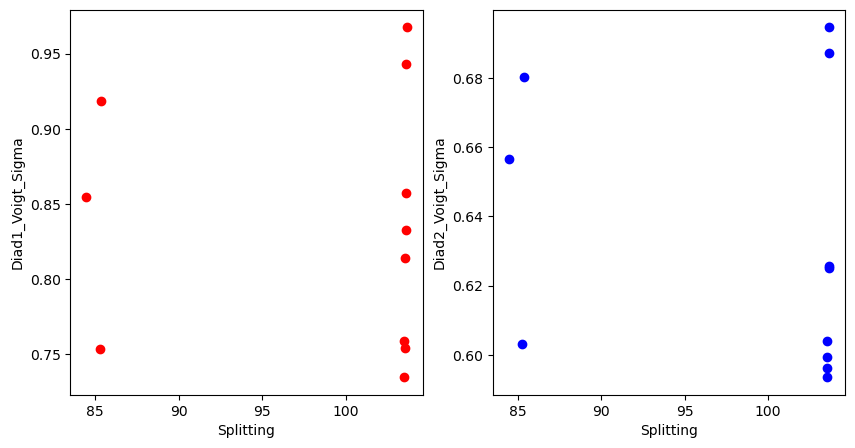

In [38]:

x='Splitting'
y1='Diad1_Voigt_Sigma'
y2='Diad2_Voigt_Sigma'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x], df_Merge[y1], 'or')
ax2.plot(df_Merge[x], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

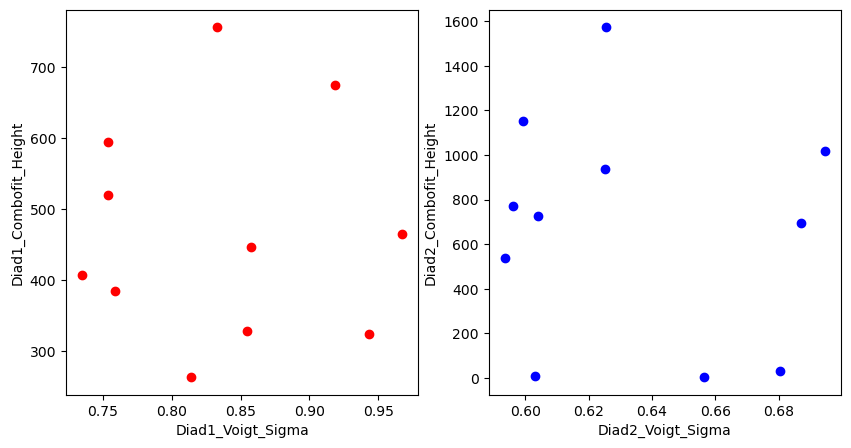

In [39]:
x1='Diad1_Voigt_Sigma'
x2='Diad2_Voigt_Sigma'
y1='Diad1_Combofit_Height'
y2='Diad2_Combofit_Height'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x1], df_Merge[y1], 'or')
ax2.plot(df_Merge[x2], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x1].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x2].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)

ax1.set_xlabel(x1)
ax1.set_ylabel(y1)
ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

In [40]:
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx')
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx')
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx')